In [1]:
from multiprocessing import Pool

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
from scipy.stats import binomtest

In [2]:
mother, father = ['CAR2493_F', 'CAR2494_M']

samples_lst = pd.read_csv('./data/interim/samples.txt', header=None)[0].to_list()
print(samples_lst)

['CAR2463', 'CAR2464', 'CAR2465', 'CAR2466', 'CAR2467', 'CAR2468', 'CAR2469', 'CAR2470', 'CAR2471', 'CAR2472', 'CAR2473', 'CAR2474', 'CAR2475', 'CAR2476', 'CAR2477', 'CAR2478', 'CAR2479', 'CAR2480', 'CAR2481', 'CAR2482', 'CAR2483', 'CAR2484', 'CAR2485', 'CAR2486', 'CAR2487', 'CAR2488', 'CAR2489', 'CAR2490', 'CAR2491', 'CAR2492', 'CAR2493_F', 'CAR2494_M']


## Check mendelian by own filtering

### bcftools call

In [5]:
# 7min
variants = pd.read_csv('./data/interim/redo/carps32.dnm2.SNPs.table.v2', sep='\t')
variants = variants[(variants.DP > 30) & (variants.CHROM != 'NC_001606.1')]
variants

,CHROM,POS,REF,ALT,QUAL,DP,MQ,AN,CAR2463.GT,CAR2463.DP,...,CAR2491.AD,CAR2492.GT,CAR2492.DP,CAR2492.AD,CAR2493_F.GT,CAR2493_F.DP,CAR2493_F.AD,CAR2494_M.GT,CAR2494_M.DP,CAR2494_M.AD
187,NC_056572.1,310,A,G,785.66,230,45,64,G/G,6,...,"5,0",A/A,9,"9,0",A/G,5,"3,2",A/A,7,"7,0"
188,NC_056572.1,410,G,C,1079.05,255,49,64,G/G,6,...,"4,1",G/G,5,"5,0",G/G,6,"6,0",G/C,12,"6,6"
189,NC_056572.1,419,C,T,1229.52,242,48,64,C/C,6,...,"1,4",C/T,6,"3,3",C/T,5,"2,3",C/C,12,"12,0"
190,NC_056572.1,468,A,T,1371.05,161,47,62,T/T,4,...,"4,0",A/T,4,"3,1",A/T,4,"3,1",A/T,9,"3,6"
191,NC_056572.1,506,T,A,39.17,90,39,58,T/T,3,...,"3,0",T/T,2,"2,0",T/T,1,"1,0",T/T,7,"7,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24064953,NC_056621.1,24465946,C,G,43.69,195,26,64,C/C,4,...,"5,0",C/C,1,"1,0",C/C,1,"1,0",C/C,10,"10,0"
24064954,NC_056621.1,24465995,C,A,17.28,166,25,60,C/C,3,...,"4,0",./.,0,"0,0",C/C,1,"1,0",C/C,10,"10,0"
24064955,NC_056621.1,24466018,C,A,1710.70,150,24,60,A/A,4,...,"1,3",./.,0,"0,0",A/A,1,"1,0",A/A,10,"0,10"
24064956,NC_056621.1,24466071,A,G,701.44,129,20,62,A/A,2,...,"1,4",A/A,1,"1,0",A/A,2,"2,0",A/G,13,"7,6"


In [75]:
variants10k = pd.read_csv('./data/interim/redo/carps32.dnm2.SNPs.table.head1M', sep='\t')
variants10k = variants10k[(variants10k.DP > 30) & (variants10k.CHROM != 'NC_001606.1')]
# variants10k = variants10k[(variants10k.DP > 30) ]
variants10k

,CHROM,POS,QUAL,DP,MQ,AN,CAR2463.GT,CAR2463.DP,CAR2463.AD,CAR2463.DNM,...,CAR2492.AD,CAR2492.DNM,CAR2493_F.GT,CAR2493_F.DP,CAR2493_F.AD,CAR2493_F.DNM,CAR2494_M.GT,CAR2494_M.DP,CAR2494_M.AD,CAR2494_M.DNM
0,NC_001606.1,141,8137.29,8863,37,64,T/T,189,"0,189",-inf,...,"0,170",-inf,T/T,187,"0,186",NaN,T/T,191,"0,191",NaN
1,NC_001606.1,169,7843.61,5853,36,64,G/G,134,"0,134",-7.443470e-03,...,"0,138",-0.007443,G/G,131,"1,130",NaN,A/A,146,"146,0",NaN
2,NC_001606.1,192,7843.61,3438,30,64,T/T,68,"0,68",-3.161920e-13,...,"0,95",0.000000,T/T,79,"0,79",NaN,C/C,54,"54,0",NaN
3,NC_001606.1,238,4786.68,1167,17,64,C/C,22,"0,22",-3.360130e+01,...,"0,21",-32.930100,C/C,29,"0,29",NaN,C/C,4,"0,4",NaN
4,NC_001606.1,239,5133.13,1125,17,64,C/C,25,"0,25",-3.563820e+01,...,"0,26",-36.736800,C/C,32,"0,32",NaN,C/C,3,"0,3",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,NC_056573.1,20196451,1023.30,637,59,64,A/A,17,"17,0",-inf,...,"10,2",-inf,A/A,16,"16,0",NaN,A/G,10,"5,5",NaN
999995,NC_056573.1,20196459,959.52,650,59,64,G/G,16,"16,0",-inf,...,"9,2",-inf,G/G,17,"17,0",NaN,G/A,10,"5,5",NaN
999996,NC_056573.1,20196466,413.87,650,59,64,T/T,11,"11,0",-3.137550e+01,...,"5,0",-27.261300,T/T,15,"15,0",NaN,T/G,7,"5,2",NaN
999997,NC_056573.1,20196472,1332.97,587,59,64,A/T,11,"7,4",-inf,...,"0,4",-14.964400,A/T,15,"7,8",NaN,A/A,6,"6,0",NaN


Filters:

1. read depth over 12;
2. Allelic balance between 0.25 and 0.75 - the  fraction  of reads supporting the alternative allele out of the reads supporting the   reference  and alternative allele
3. TODO genotype likelihood difference greater than 20 between the highest and    second-highest scoring genotype (GQ).

In [6]:
variants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23106849 entries, 187 to 24064957
Columns: 104 entries, CHROM to CAR2494_M.AD
dtypes: float64(1), int64(36), object(67)
memory usage: 18.1+ GB


In [77]:
variants10k.iloc[:, :15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964432 entries, 187 to 999998
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CHROM        964432 non-null  object 
 1   POS          964432 non-null  int64  
 2   QUAL         964432 non-null  float64
 3   DP           964432 non-null  int64  
 4   MQ           964432 non-null  int64  
 5   AN           964432 non-null  int64  
 6   CAR2463.GT   964432 non-null  object 
 7   CAR2463.DP   964432 non-null  int64  
 8   CAR2463.AD   964432 non-null  object 
 9   CAR2463.DNM  918161 non-null  float64
 10  CAR2464.GT   964432 non-null  object 
 11  CAR2464.DP   964432 non-null  int64  
 12  CAR2464.AD   964432 non-null  object 
 13  CAR2464.DNM  918161 non-null  float64
 14  CAR2465.GT   964432 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 117.7+ MB


<AxesSubplot:>

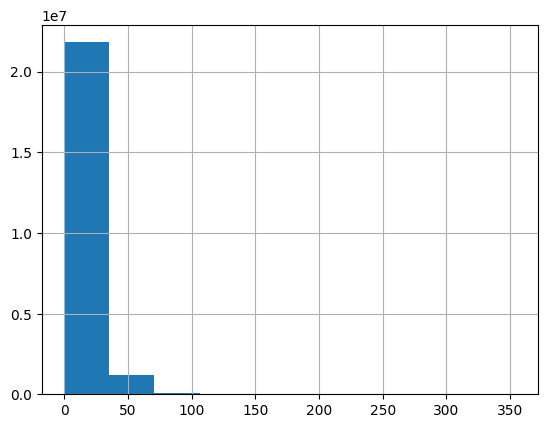

In [106]:
variants['CAR2463.DP'].hist()
# plt.vlines(12, 0, 600, 'red')

<AxesSubplot:>

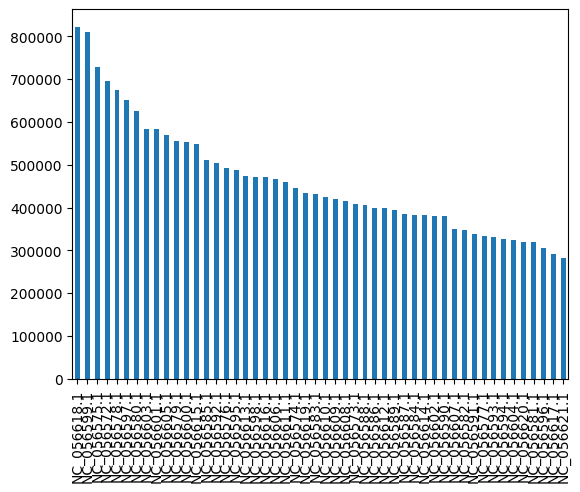

In [7]:
variants['CHROM'].value_counts().plot.bar()

In [8]:
mother, father = ['CAR2493_F', 'CAR2494_M']

def is_mend_err_by_gt(ser: pd.Series):
    trio = ser[8], ser.loc[mother+'.GT'], ser.loc[father+'.GT']
    pgt, mgt, fgt = [set(x.split('/')) for x in trio]

    is_m_child = bool(pgt.intersection(mgt))
    is_f_child = bool(pgt.intersection(fgt))

    # print(pgt, mgt, fgt, is_m_child, is_f_child)
    return not (is_m_child and is_f_child)

# is_mend_err_by_gt(cur_df.iloc[220])

In [26]:
basic_cols = ['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'DP', 'MQ', 'AN']

def process_chunk(chunk: pd.DataFrame):
    collected_mend_errs = []

    for proband in samples_lst[:-2]:
        fam_cols = [c for c in chunk.columns if proband in c or mother in c or father in c]
        cur_df: pd.DataFrame = chunk[basic_cols + fam_cols]
        
        cur_df = cur_df[(cur_df[proband+'.DP'] > 10) & \
                        (cur_df[mother+'.DP'] > 10) & \
                        (cur_df[father+'.DP'] > 10)]
        # cur_df = cur_df[(cur_df[proband+'.GT'] != cur_df[mother+'.GT']) | \
        #                 (cur_df[proband+'.GT'] != cur_df[father+'.GT'])]
        
        cur_df = cur_df[cur_df.apply(is_mend_err_by_gt, 1)]

        collected_mend_errs.append(cur_df.copy())
        
    return collected_mend_errs


def split_dataframe(df, n_chunks):
    chunk_size = int(np.ceil(len(df) / n_chunks))
    return [df.iloc[i:i + chunk_size] for i in range(0, len(df), chunk_size)]

In [27]:
n_chunks = 128
chunks = split_dataframe(variants, n_chunks)
assert sum([len(x) for x in chunks]) == len(variants)

In [137]:
# collected_mend_errs = process_chunk(chunks[0])

In [29]:
# 15min
with Pool(n_chunks) as pool:
    results = pool.map(process_chunk, chunks)

In [30]:
results[0][0]

,CHROM,POS,REF,ALT,QUAL,DP,MQ,AN,CAR2463.GT,CAR2463.DP,CAR2463.AD,CAR2493_F.GT,CAR2493_F.DP,CAR2493_F.AD,CAR2494_M.GT,CAR2494_M.DP,CAR2494_M.AD
10988,NC_056572.1,678872,T,C,5921.19,770,60,64,C/C,14,"1,13",T/T,17,"17,0",C/C,15,"0,15"
12033,NC_056572.1,748585,A,T,6112.17,856,59,64,A/A,11,"11,0",A/T,23,"12,11",T/T,11,"0,11"
12622,NC_056572.1,799414,T,A,5464.77,656,59,64,T/T,16,"16,0",T/A,27,"10,17",A/A,19,"2,17"
13515,NC_056572.1,858686,A,C,5960.60,630,60,64,A/A,11,"11,0",A/C,18,"9,9",C/C,13,"0,13"
13516,NC_056572.1,858698,G,A,6070.27,622,60,64,G/G,11,"11,0",G/A,20,"10,10",A/A,14,"0,14"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173143,NC_056572.1,9579581,C,A,748.93,651,9,64,A/A,15,"5,10",C/A,14,"10,4",C/C,13,"11,2"
173146,NC_056572.1,9579726,G,A,1604.66,3167,11,64,G/G,109,"14,95",A/A,90,"2,88",G/G,93,"10,83"
177644,NC_056572.1,9806288,G,C,907.12,462,25,64,C/C,16,"0,16",G/C,16,"8,8",G/G,13,"10,3"
177645,NC_056572.1,9806299,G,C,1339.35,468,26,64,C/C,17,"0,17",G/C,17,"8,9",G/G,13,"10,3"


In [31]:
for i, smpl in enumerate(samples_lst[:-2]):
    print(i, smpl)

    smpl_df = pd.concat([x[i] for x in results]).assign(PROBAND=smpl)
    smpl_df.to_csv(f'./data/interim/mend_errors/{smpl}.csv', index=False)

0 CAR2463
1 CAR2464
2 CAR2465
3 CAR2466
4 CAR2467
5 CAR2468
6 CAR2469
7 CAR2470
8 CAR2471
9 CAR2472
10 CAR2473
11 CAR2474
12 CAR2475
13 CAR2476
14 CAR2477
15 CAR2478
16 CAR2479
17 CAR2480
18 CAR2481
19 CAR2482
20 CAR2483
21 CAR2484
22 CAR2485
23 CAR2486
24 CAR2487
25 CAR2488
26 CAR2489
27 CAR2490
28 CAR2491
29 CAR2492


<AxesSubplot:xlabel='CAR2463.DNM', ylabel='Density'>

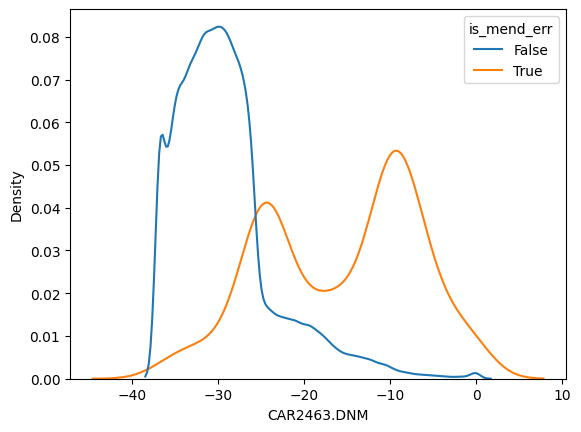

In [100]:
sns.kdeplot(cur_df, x='CAR2463.DNM', hue='is_mend_err', common_norm=False)

### GATK call

In [ ]:
# 10min
# variants = pd.read_csv('./data/interim/bams/cohort.merged.table', sep='\t')
# variants = pd.read_csv('./data/interim/cor/cohort.merged.table', sep='\t')
# variants = variants[(variants.DP > 30) & (variants.QUAL > 30) & (variants.CHROM != 'NC_001606.1')]
# variants = variants[(~variants.hiConfDeNovo.isna()) | (~variants.loConfDeNovo.isna())]

# for col in variants.columns:
#     if col.endswith('.AD'):
#         variants[col] = variants[col].apply(lambda x: [int(ad) for ad in x.split(',')])

# variants[(~variants.hiConfDeNovo.isna())]\
#     .to_csv('./data/interim/cor/cohort.merged.table.hidenovo', sep='\t')
# variants[(~variants.hiConfDeNovo.isna())]\
#     .to_parquet('./data/interim/cor/cohort.merged.table.hidenovo.parquet')

In [ ]:
# variants = pd.read_csv('./data/interim/cor/cohort.merged.table', sep='\t')
# variants = variants[(variants.QUAL > 30) & (variants.CHROM != 'NC_001606.1')]
# variants[[x for x in variants.columns if x.endswith('.DP')]].median()

In [3]:
variants = pd.read_parquet('./data/interim/cor/cohort.merged.table.hidenovo.parquet')
variants

,CHROM,POS,REF,ALT,QUAL,DP,MQ,AN,hiConfDeNovo,loConfDeNovo,...,CAR2492.AD,CAR2492.GQ,CAR2493_F.GT,CAR2493_F.DP,CAR2493_F.AD,CAR2493_F.GQ,CAR2494_M.GT,CAR2494_M.DP,CAR2494_M.AD,CAR2494_M.GQ
375,NC_056572.1,41100,TA,T,32.39,585,60.00,64,CAR2478,None,...,"[25, 0]",72.0,TA/TA,31.0,"[31, 0]",90.0,TA/TA,31.0,"[31, 0]",81.0
376,NC_056572.1,41102,TA,T,32.39,586,60.00,64,CAR2478,None,...,"[25, 0]",72.0,TA/TA,31.0,"[31, 0]",90.0,TA/TA,31.0,"[31, 0]",81.0
380,NC_056572.1,41845,C,T,107.42,725,60.00,64,CAR2479,None,...,"[31, 0]",90.0,C/C,34.0,"[34, 0]",99.0,C/C,29.0,"[29, 0]",81.0
465,NC_056572.1,46028,T,C,97.71,324,60.00,64,CAR2478,None,...,"[4, 0]",0.0,T/T,10.0,"[10, 0]",30.0,T/T,8.0,"[8, 0]",24.0
504,NC_056572.1,49540,T,A,57.42,322,59.96,62,CAR2480,None,...,"[12, 0]",36.0,T/T,13.0,"[13, 0]",30.0,T|T,10.0,"[10, 0]",30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26170578,NC_056621.1,24429381,T,A,292.85,744,59.68,64,"CAR2474,CAR2488,CAR2491",None,...,"[27, 0]",75.0,T/T,11.0,"[11, 0]",33.0,T/T,30.0,"[30, 0]",48.0
26170579,NC_056621.1,24429391,G,C,295.86,702,59.45,64,"CAR2474,CAR2488,CAR2491",None,...,"[24, 0]",72.0,G/G,10.0,"[10, 0]",30.0,G/G,29.0,"[29, 0]",44.0
26170603,NC_056621.1,24433427,A,G,32.67,618,59.93,64,CAR2474,None,...,"[13, 0]",27.0,A/A,25.0,"[25, 0]",66.0,A/A,22.0,"[22, 0]",57.0
26170605,NC_056621.1,24433516,A,G,32.42,634,59.92,64,CAR2474,None,...,"[20, 0]",60.0,A/A,21.0,"[21, 0]",60.0,A/A,20.0,"[20, 0]",60.0


- **hiConfDeNovo**  Description="High confidence possible de novo mutation (GQ >= 20 for all trio members)=[comma-delimited list of child samples]">
- **loConfDeNovo**  Description="Low confidence possible de novo mutation (GQ >= 10 for child, GQ > 0 for parents)=[comma-delimited list of child samples]">

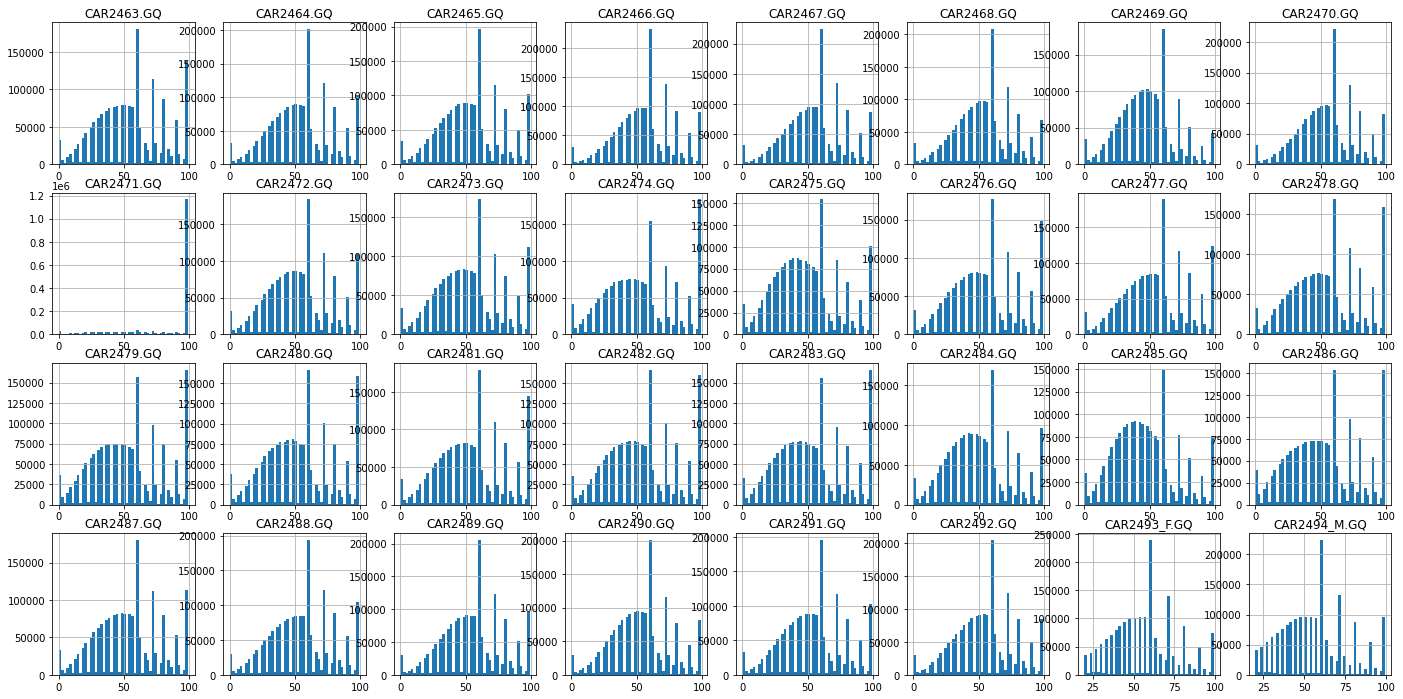

In [8]:
plt.figure(figsize=(24, 12))
for i,s in enumerate([x for x in variants.columns if '.GQ' in x], 1):
    plt.subplot(4, 8, i)
    variants[s][variants[s]<100].hist(bins=50)
    plt.title(s)

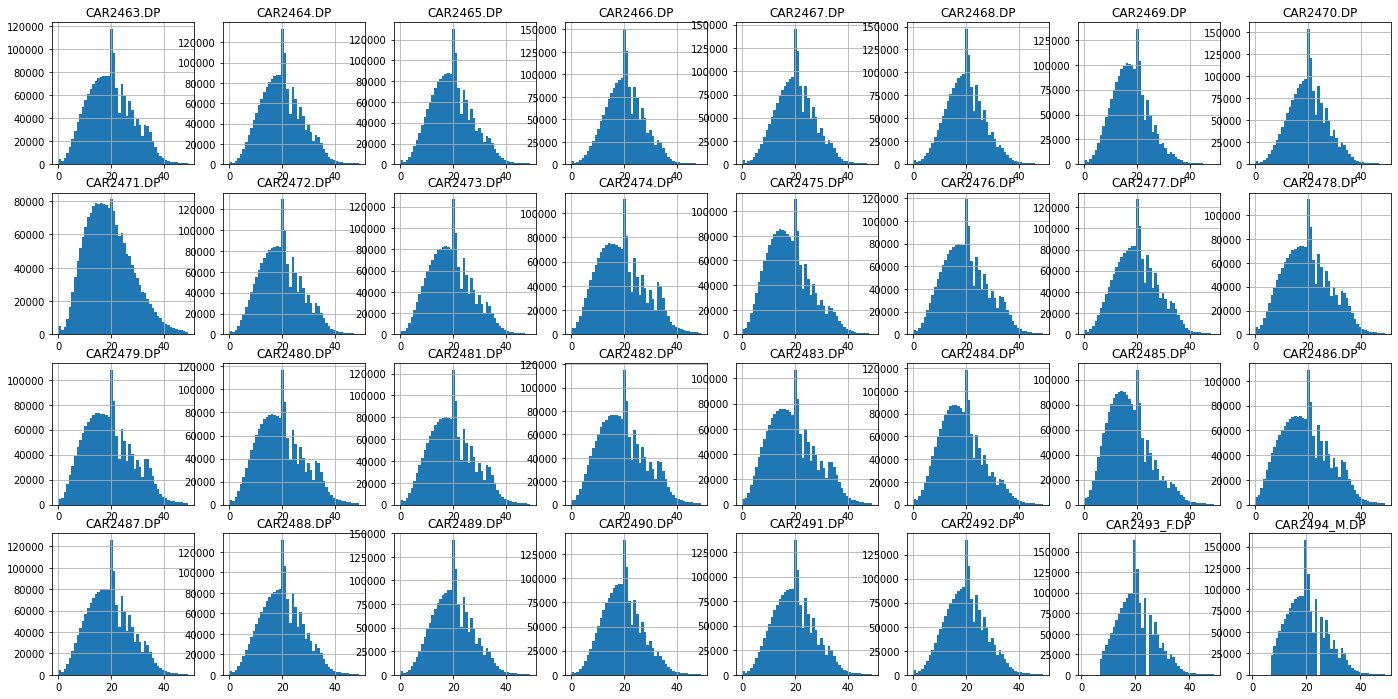

In [9]:
plt.figure(figsize=(24, 12))
for i,s in enumerate([x for x in variants.columns if '.DP' in x], 1):
    plt.subplot(4, 8, i)
    variants[s][variants[s]<50].hist(bins=50)
    plt.title(s)

In [5]:
binomtest(12, 35)

BinomTestResult(k=12, n=35, alternative='two-sided', statistic=0.34285714285714286, pvalue=0.08953107893466952)

In [3]:
binomtest(3, 16)

BinomTestResult(k=3, n=16, alternative='two-sided', statistic=0.1875, pvalue=0.021270751953125)

In [22]:
binomtest(4, 16)

BinomTestResult(k=4, n=16, alternative='two-sided', statistic=0.25, pvalue=0.076812744140625)

<AxesSubplot:xlabel='CHROM'>

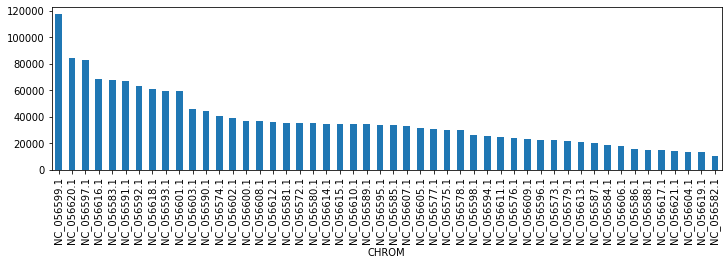

In [6]:
plt.figure(figsize=(12, 3))
variants['CHROM'].value_counts().plot.bar()

Filters:

1. read depth (AD) over 12;
2. Allelic balance between 0.25 and 0.75 - the  fraction  of reads supporting the alternative allele out of the reads supporting the   reference  and alternative allele
3. TODO genotype likelihood difference greater than 20 between the highest and    second-highest scoring genotype (GQ).

https://sciwheel.com/work/item/4248945/resources/10217061/pdf

We extracted de novo candidates from the variants satisfying the following  criteria: 

1. the proband had to be an alternative allele carrier; 
2. **for homozygous alternative allele carriers**, we only considered candidates with ≤   1 read supporting the  reference allele; 
3. minimum depth in the **parent** of **12** reads for the autosomes and 6 reads for hemizygous chromosomes; 
4. maximum of 1 read supporting the alternative allele in the parent; 
5. parent allelic balance <= 0.05;
6. minimum depth of 12 reads for proband;
7. proband allelic balance >= 0.15;
8. maximum of 10 possible and 3 likely carriers beyond the descendants of the parent pair; 
9. maximum of 10% average soft clipping per read covering the DNM candidate. 

In [7]:

# def is_mend_err_by_gt_gatk(ser: pd.Series, proband):
#     # hiConfDeNovo CONTAIN THIS INFO
#     trio = ser.loc[proband+'.GT'], ser.loc[mother+'.GT'], ser.loc[father+'.GT']
#     pgt, mgt, fgt = [set(x.replace('|', '/').split('/')) for x in trio]

#     is_m_child = bool(pgt.difference(mgt))
#     is_f_child = bool(pgt.difference(fgt))

#     return is_m_child or is_f_child

In [4]:
def calc_allele_balance(AD: list):
    """Here we define allelic balance as the   fraction  of reads supporting the alternative allele 
    out of the reads supporting the   reference  and alternative alleles
    """
    assert len(AD) == 2
    ref_support, alt_support = AD

    return alt_support / (ref_support + alt_support)


def estimate_minimal_ad(coverage_median):
    for i in range(1, coverage_median):
        res = binomtest(i, coverage_median)
        if res.pvalue >= 0.05:
            break
    return i

In [5]:
variants[mother+'.AD']

375         [31, 0]
376         [31, 0]
380         [34, 0]
465         [10, 0]
504         [13, 0]
             ...   
26170578    [11, 0]
26170579    [10, 0]
26170603    [25, 0]
26170605    [21, 0]
26170612    [14, 0]
Name: CAR2493_F.AD, Length: 1836936, dtype: object

/tmp/ipykernel_37204/3305958877.py:8: RuntimeWarning: invalid value encountered in long_scalars
  return alt_support / (ref_support + alt_support)


<AxesSubplot:>

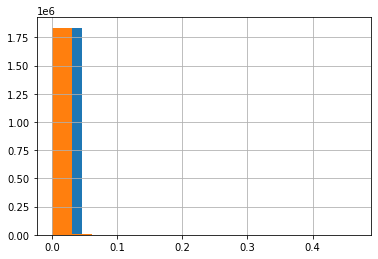

In [14]:
variants[mother+'.AD'].apply(calc_allele_balance).hist()
variants[father+'.AD'].apply(calc_allele_balance).hist()

In [6]:
AD_MIN = 4

In [37]:
# def filter_by_parent(ad: list):
#     minor = min(ad)
#     major = max(ad)

#     if minor <= 1 and major < AD_MIN:
#         return False
#     if minor > 1 and major >= AD_MIN: ????


def filter_by_proband(ad: list):
    minor = min(ad)
    major = max(ad)

    # ab = ad[1] / (minor + major)

    if minor <= 1:
        # homozyg
        if major < AD_MIN:
            return False
    else:
        # heterozyg
        if minor < AD_MIN:
            return False
    
    return True


def is_indel(var: pd.Series):
    ref = var['REF']
    alt = var['ALT'].split(',')
    if '*' in alt:
        return True
    
    if any([len(x) > 1 for x in [ref]+alt]):
        return True
    return False

def is_homozyg(gt: str):
    a, b = gt.replace('|', '/').split('/')
    return a == b

In [8]:
chi_ad = pd.DataFrame(variants[samples_lst[0]+'.AD'].to_list(), columns=['ad_ref', 'ad_alt'])
moz_ad = pd.DataFrame(variants[mother+'.AD'].to_list(), columns=['ad_ref', 'ad_alt'])
faz_ad = pd.DataFrame(variants[father+'.AD'].to_list(), columns=['ad_ref', 'ad_alt'])

In [9]:
variants[samples_lst[0]+'.DP'].quantile(0.99)

44.0

<AxesSubplot:>

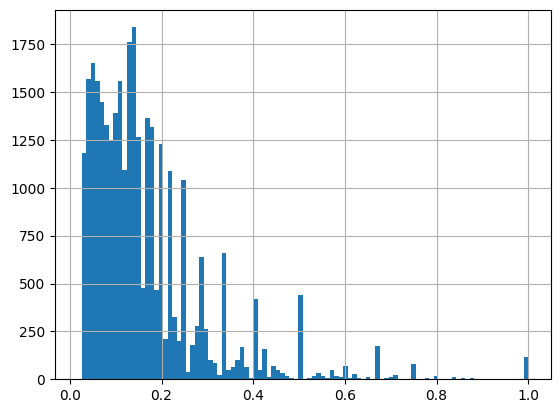

In [10]:
_ = variants[samples_lst[0]+'.AD'].apply(lambda x: x[1] / sum(x))

_[_ > 0].hist(bins=100)

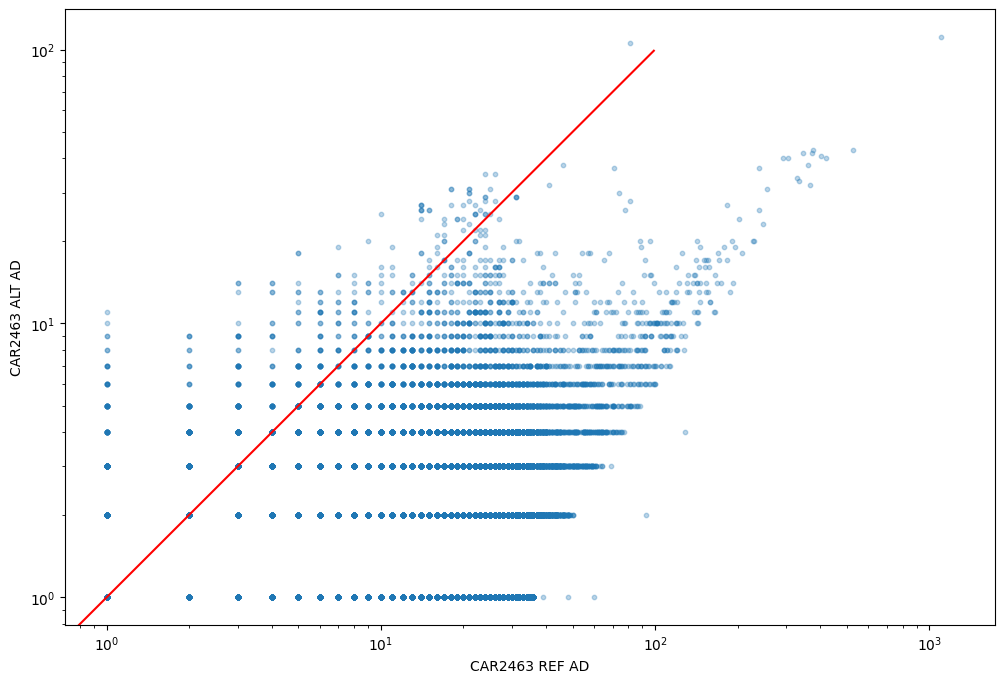

In [28]:
plt.figure(figsize=(12, 8))
plt.scatter(chi_ad.ad_ref, chi_ad.ad_alt, alpha=0.3, s=10)
plt.plot(np.arange(100), np.arange(100), 'r')
plt.xlabel('CAR2463 REF AD')
plt.ylabel('CAR2463 ALT AD')

plt.xscale('log')
plt.yscale('log')
plt.show()

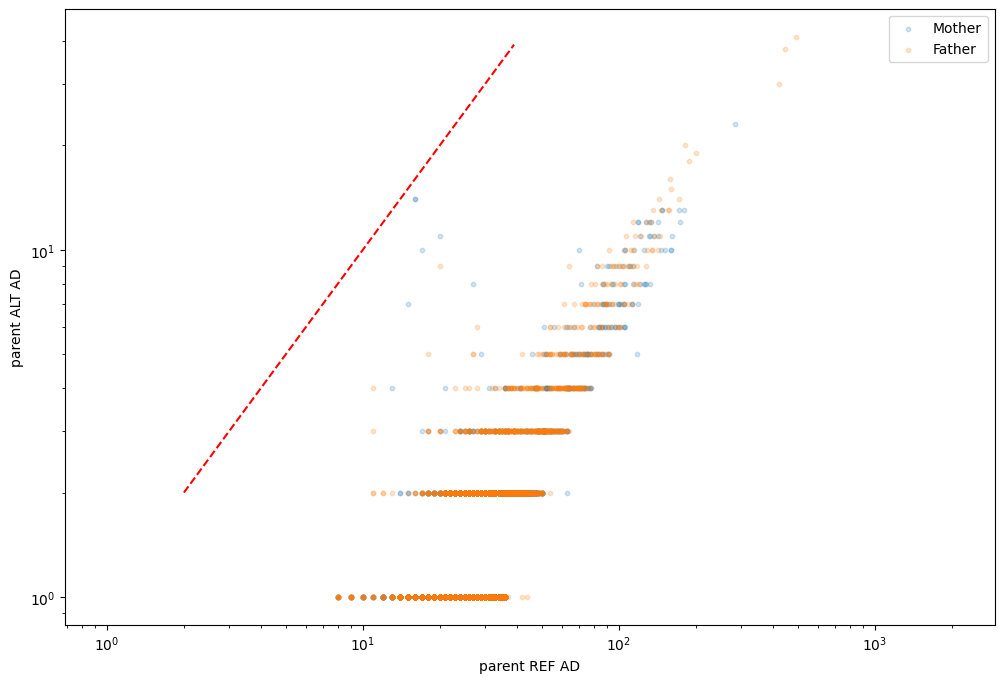

In [26]:
plt.figure(figsize=(12, 8))
plt.scatter(moz_ad.ad_ref, moz_ad.ad_alt, label='Mother', alpha=0.2, s=10)
plt.scatter(faz_ad.ad_ref, faz_ad.ad_alt, label='Father', alpha=0.2, s=10)

plt.plot(np.arange(2, 40), np.arange(2, 40), 'r--')

plt.xlabel('parent REF AD')
plt.ylabel('parent ALT AD')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [13]:
variants[variants.hiConfDeNovo.str.contains(samples_lst[0])][[samples_lst[0]+'.AD', mother+'.AD', father+'.AD']].sample(10)

,CAR2463.AD,CAR2493_F.AD,CAR2494_M.AD
18150779,"[8, 2]","[11, 0]","[14, 0]"
21785230,"[12, 2]","[18, 0]","[16, 0]"
10942866,"[14, 2]","[21, 0]","[34, 0]"
24351862,"[12, 2]","[23, 0]","[38, 0]"
2414724,"[23, 5]","[17, 0]","[16, 0]"
10023473,"[10, 3]","[14, 0]","[25, 0]"
21523242,"[8, 2]","[21, 0]","[25, 0]"
13519036,"[3, 4]","[9, 0]","[13, 0]"
12375048,"[4, 4]","[13, 0]","[7, 0]"
17754048,"[24, 3]","[16, 0]","[23, 1]"


In [29]:
basic_cols = ['CHROM', 'POS', 'REF', 'ALT', 'hiConfDeNovo']
ad_min = estimate_minimal_ad(16) # 4
print(ad_min)

4


In [30]:
chunk = variants#.head(100000)

In [61]:
collected_mend_errs = []

for i, proband in enumerate(samples_lst[:-2], 1):
    fam_cols = []
    for S in [proband, mother, father]:
        for CC in ['GT', 'AD']:
            fam_cols.append(S+'.'+CC)

    cur_df: pd.DataFrame = chunk[basic_cols + fam_cols]

    # must contain ALT allele
    cur_df = cur_df[cur_df[proband+'.AD'].apply(lambda x: x[0] >= 10 and x[1] >= 10)]
    
    # select variatns that has hiConfDeNovo according to GATK 
    cur_df = cur_df[cur_df.hiConfDeNovo.str.contains(proband)]

    # is indel?
    cur_df['indel'] = cur_df.apply(is_indel, axis=1)

    # TODO remove
    cur_df = cur_df[~cur_df.indel]
    
    # calculate allele balance
    # cur_df['proband_ab'] = cur_df[proband+'.AD'].apply(lambda x: x[1] / sum(x))
    # cur_df['mother_ab'] = cur_df[mother+'.AD'].apply(lambda x: x[1] / sum(x))
    # cur_df['father_ab'] = cur_df[father+'.AD'].apply(lambda x: x[1] / sum(x))

    # # is homozyg
    # cur_df['proband_homoz'] = cur_df[proband+'.GT'].apply(is_homozyg)
    # cur_df['mother_homoz'] = cur_df[mother+'.GT'].apply(is_homozyg)
    # cur_df['father_homoz'] = cur_df[father+'.GT'].apply(is_homozyg)

    # cur_df = cur_df[
    #     (cur_df.proband_ab > 0.25) &
    #     (cur_df.mother_ab <= 0.00) &
    #     (cur_df.mother_ab <= 0.00)
    # ]

    
    # 
    # cur_df = cur_df[(cur_df[proband+'.AD'].apply(filter_by_proband)) & \
    #                 (cur_df[mother+'.AD'].apply(filter_by_proband)) & \
    #                 (cur_df[father+'.AD'].apply(filter_by_proband))]

    # cur_df = cur_df[(cur_df[proband+'.GT'] != cur_df[mother+'.GT']) | \
    #                 (cur_df[proband+'.GT'] != cur_df[father+'.GT'])]
    
    # cur_df = cur_df[cur_df.apply(is_mend_err_by_gt_gatk, 1, proband=proband)]

    collected_mend_errs.append(cur_df.copy())

    print(proband, len(cur_df))
    if i % 10 == 0:
        print()
    # break

# cur_df

CAR2463 290
CAR2464 238
CAR2465 251
CAR2466 225
CAR2467 264
CAR2468 252
CAR2469 218
CAR2470 297
CAR2471 327692
CAR2472 251

CAR2473 547
CAR2474 1396
CAR2475 487
CAR2476 608
CAR2477 606
CAR2478 653
CAR2479 597
CAR2480 630
CAR2481 607
CAR2482 783

CAR2483 464
CAR2484 455
CAR2485 372
CAR2486 763
CAR2487 673
CAR2488 430
CAR2489 600
CAR2490 413
CAR2491 581
CAR2492 599



In [66]:
labels = ['ctrl'] * 10 + ['nem-shok'] * 10 + ['nem'] * 10
dnms = pd.DataFrame(list(zip(samples_lst[:-2], [len(x) for x in collected_mend_errs])), 
                    columns=['sample', 'dnm'])
dnms['grp'] = labels
dnms = dnms[dnms['sample'] != 'CAR2471']
dnms

,sample,dnm,grp
0,CAR2463,290,ctrl
1,CAR2464,238,ctrl
2,CAR2465,251,ctrl
3,CAR2466,225,ctrl
4,CAR2467,264,ctrl
5,CAR2468,252,ctrl
6,CAR2469,218,ctrl
7,CAR2470,297,ctrl
9,CAR2472,251,ctrl
10,CAR2473,547,nem-shok


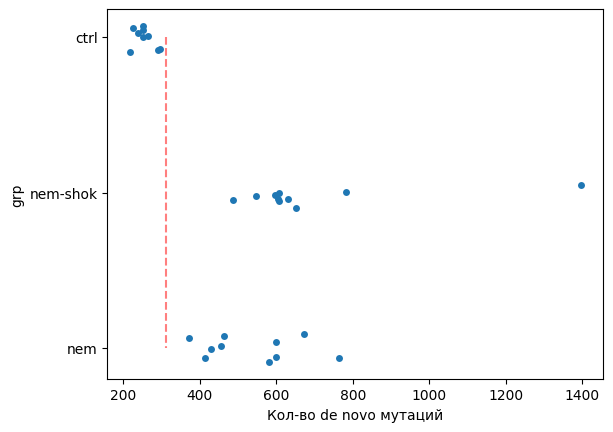

In [73]:
sns.stripplot(dnms, x='dnm', y='grp')

max_ctrl_val = dnms[(dnms['grp'] == 'ctrl')]['dnm'].max()
plt.vlines(max_ctrl_val * 1.05, 0, 2, 'red', 'dashed', '0.02', alpha=0.5,)

plt.xlabel('Кол-во de novo мутаций')
# plt.xscale('log')
# plt.savefig('./figures/dnv_mend_ratio.pdf');
plt.show()

In [158]:
cur_df[cur_df[proband+'.AD'].apply(lambda x: x[1] >= 4)]
# cur_df[[proband+'.GT', proband+'.AD', mother+'.AD', father+'.AD']].sample(10)

,CHROM,POS,REF,ALT,hiConfDeNovo,CAR2463.GT,CAR2463.AD,CAR2493_F.GT,CAR2493_F.AD,CAR2494_M.GT,CAR2494_M.AD,proband_ab,mother_ab,father_ab
18237,NC_056572.1,930320,T,TGAGGGCAGGCGCGC,"CAR2463,CAR2469",T/TGAGGGCAGGCGCGC,"[13, 7]",T/T,"[23, 0]",T/T,"[30, 0]",0.350000,0.0,0.0
25644,NC_056572.1,1185253,ATCTGTTAGCTCTGCAGGAAGTAGAAAGAGG,A,CAR2463,ATCTGTTAGCTCTGCAGGAAGTAGAAAGAGG|A,"[8, 6]",ATCTGTTAGCTCTGCAGGAAGTAGAAAGAGG/ATCTGTTAGCTCTG...,"[12, 0]",ATCTGTTAGCTCTGCAGGAAGTAGAAAGAGG/ATCTGTTAGCTCTG...,"[16, 0]",0.428571,0.0,0.0
25645,NC_056572.1,1185286,C,T,CAR2463,C|T,"[8, 8]",C/C,"[12, 0]",C/C,"[14, 0]",0.500000,0.0,0.0
59735,NC_056572.1,2365286,C,CACGATATATAGCGGCCGATGATTAATGCGCATCTCGCCAGTAAAG...,CAR2463,C|CACGATATATAGCGGCCGATGATTAATGCGCATCTCGCCAGTAA...,"[1, 7]",C|C,"[18, 0]",C/C,"[7, 0]",0.875000,0.0,0.0
80804,NC_056572.1,2939245,CAGTAAA,C,CAR2463,CAGTAAA|C,"[14, 4]",CAGTAAA/CAGTAAA,"[34, 0]",CAGTAAA/CAGTAAA,"[33, 0]",0.222222,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26155957,NC_056621.1,22728145,A,G,"CAR2463,CAR2473",A/G,"[26, 4]",A/A,"[20, 0]",A/A,"[18, 0]",0.133333,0.0,0.0
26164902,NC_056621.1,23679818,CCG,C,CAR2463,CCG|C,"[39, 4]",CCG/CCG,"[26, 0]",CCG/CCG,"[20, 0]",0.093023,0.0,0.0
26164903,NC_056621.1,23679822,T,G,CAR2463,T|G,"[40, 4]",T/T,"[25, 0]",T/T,"[20, 0]",0.090909,0.0,0.0
26164904,NC_056621.1,23679825,C,CGCACTGAG,CAR2463,C|CGCACTGAG,"[39, 4]",C/C,"[27, 0]",C/C,"[20, 0]",0.093023,0.0,0.0


In [196]:
basic_cols = ['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'DP', 'MQ', 'AN', 'hiConfDeNovo']

def process_chunk(chunk: pd.DataFrame):
    collected_mend_errs = []
    
    ad_min = estimate_minimal_ad(16) # 4

    for proband in samples_lst[:-2]:
        fam_cols = [c for c in chunk.columns if proband in c or mother in c or father in c]
        
        cur_df: pd.DataFrame = chunk[basic_cols + fam_cols]
        
        cur_df = cur_df[cur_df.hiConfDeNovo.str.contains(proband)]
        
        cur_df['allele_balance'] = cur_df[proband+'.AD'].apply(calc_allele_balance)
        
        cur_df = cur_df[(cur_df[proband+'.AD'].apply(min) >= ad_min) & \
                        (cur_df[mother+'.AD'].apply(min)  >= ad_min) & \
                        (cur_df[father+'.AD'].apply(min)  >= ad_min)]
        # cur_df = cur_df[(cur_df[proband+'.GT'] != cur_df[mother+'.GT']) | \
        #                 (cur_df[proband+'.GT'] != cur_df[father+'.GT'])]
        
        # cur_df = cur_df[cur_df.apply(is_mend_err_by_gt_gatk, 1, proband=proband)]

        collected_mend_errs.append(cur_df.copy())
        
    return collected_mend_errs


def split_dataframe(df, n_chunks):
    chunk_size = int(np.ceil(len(df) / n_chunks))
    return [df.iloc[i:i + chunk_size] for i in range(0, len(df), chunk_size)]

In [24]:
# n_chunks = 32
# chunks = split_dataframe(variants, n_chunks)
# assert sum([len(x) for x in chunks]) == len(variants)

# # 15min
# with Pool(n_chunks) as pool:
#     results = pool.map(process_chunk, chunks)

# for i, smpl in enumerate(samples_lst[:-2]):
#     print(i, smpl)

#     smpl_df = pd.concat([x[i] for x in results]).assign(PROBAND=smpl)
#     smpl_df.to_csv(f'./data/interim/mend_errors_gatk/{smpl}.csv', index=False)

In [69]:
# number of pre-DNM variants shared between samples
(variants.hiConfDeNovo.str.count(',')+1).value_counts()

1    1656646
2     132316
3      47974
Name: hiConfDeNovo, dtype: int64

In [197]:
collected_mend_errs = process_chunk(variants.head(10000))
collected_mend_errs[0]

CAR2463 14.0 3
CAR2464 12.0 3
CAR2465 14.0 3
CAR2466 13.5 3
CAR2467 14.0 3
CAR2468 12.0 3
CAR2469 14.0 3
CAR2470 14.0 3
CAR2471 16.0 4
CAR2472 13.0 3
CAR2473 12.0 3
CAR2474 15.0 4
CAR2475 11.0 2
CAR2476 15.0 4
CAR2477 14.0 3
CAR2478 13.0 3
CAR2479 14.0 3
CAR2480 14.0 3
CAR2481 13.0 3
CAR2482 13.0 3
CAR2483 14.0 3
CAR2484 13.0 3
CAR2485 13.0 3
CAR2486 14.0 3
CAR2487 12.0 3
CAR2488 14.0 3
CAR2489 14.0 3
CAR2490 13.0 3
CAR2491 14.0 3
CAR2492 14.0 3


,CHROM,POS,REF,ALT,QUAL,DP,MQ,AN,hiConfDeNovo,CAR2463.GT,...,CAR2463.AD,CAR2463.GQ,CAR2493_F.GT,CAR2493_F.DP,CAR2493_F.AD,CAR2493_F.GQ,CAR2494_M.GT,CAR2494_M.DP,CAR2494_M.AD,CAR2494_M.GQ
6033,NC_056572.1,326529,G,T,53.42,675,59.94,64,"CAR2463,CAR2474",G|T,...,"[10, 2]",54.0,G/G,23.0,"[23, 0]",60.0,G/G,20.0,"[20, 0]",60.0
6034,NC_056572.1,326531,G,A,38.67,676,59.92,64,CAR2463,G|A,...,"[10, 2]",54.0,G/G,22.0,"[22, 0]",57.0,G/G,20.0,"[20, 0]",60.0
9632,NC_056572.1,506932,GT,G,57.16,958,60.00,64,"CAR2463,CAR2471",GT/G,...,"[14, 3]",34.0,GT/GT,39.0,"[39, 0]",90.0,GT/GT,32.0,"[30, 2]",40.0
9717,NC_056572.1,511689,ATT,A,119.13,462,60.00,64,"CAR2463,CAR2491",ATT|A,...,"[11, 2]",51.0,ATT/ATT,21.0,"[21, 0]",63.0,ATT/ATT,16.0,"[16, 0]",45.0
9719,NC_056572.1,511695,G,T,126.60,464,60.00,60,"CAR2463,CAR2491",G|T,...,"[11, 2]",51.0,G/G,20.0,"[20, 0]",60.0,G/G,16.0,"[16, 0]",45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260969,NC_056572.1,12444520,ATTTAGCTGCTGCCATCTGTGTC,A,46.01,653,59.99,64,"CAR2463,CAR2488",ATTTAGCTGCTGCCATCTGTGTC|A,...,"[15, 2]",39.0,ATTTAGCTGCTGCCATCTGTGTC/ATTTAGCTGCTGCCATCTGTGTC,24.0,"[24, 0]",72.0,ATTTAGCTGCTGCCATCTGTGTC|ATTTAGCTGCTGCCATCTGTGTC,18.0,"[18, 0]",53.0
275326,NC_056572.1,13209326,A,T,74.47,429,59.25,64,CAR2463,A|T,...,"[11, 3]",90.0,A/A,19.0,"[19, 0]",57.0,A/A,21.0,"[21, 0]",60.0
286458,NC_056572.1,13771343,T,TAAAAC,68.45,751,59.90,64,CAR2463,T|TAAAAC,...,"[14, 3]",84.0,T/T,17.0,"[17, 0]",48.0,T/T,39.0,"[18, 0]",99.0
288163,NC_056572.1,13818909,A,AAAAGTCGAGAACCCTGGTTCTGAGTCC,58.64,635,59.77,64,"CAR2463,CAR2472",A|AAAAGTCGAGAACCCTGGTTCTGAGTCC,...,"[13, 2]",45.0,A/A,19.0,"[19, 0]",45.0,A/A,27.0,"[27, 0]",48.0


In [137]:
collected_mend_errs[1]['CAR2464.DP'].describe()

count    12924.000000
mean        23.309115
std         17.443268
min         12.000000
25%         15.000000
50%         20.000000
75%         27.000000
max        777.000000
Name: CAR2464.DP, dtype: float64

In [96]:
for i, smpl in enumerate(samples_lst[:-2]):

    smpl_df = collected_mend_errs[i].assign(PROBAND=smpl)
    print(i, smpl, len(smpl_df))
    smpl_df.to_csv(f'./data/interim/mend_errors_gatk/{smpl}.csv', index=False)

0 CAR2463 11858
1 CAR2464 12924
2 CAR2465 12175
3 CAR2466 12366
4 CAR2467 12027
5 CAR2468 10049
6 CAR2469 9363
7 CAR2470 14018
8 CAR2471 972397
9 CAR2472 15428
10 CAR2473 18517
11 CAR2474 46705
12 CAR2475 9672
13 CAR2476 11431
14 CAR2477 12295
15 CAR2478 11047
16 CAR2479 18485
17 CAR2480 23562
18 CAR2481 17488
19 CAR2482 19708
20 CAR2483 12893
21 CAR2484 10379
22 CAR2485 10138
23 CAR2486 19657
24 CAR2487 15991
25 CAR2488 12405
26 CAR2489 14957
27 CAR2490 11489
28 CAR2491 18922
29 CAR2492 10836


## Continue filtering of DNM

In [97]:
def is_indel(var: pd.Series):
    ref = var['REF']
    alt = var['ALT'].split(',')
    if '*' in alt:
        return True
    
    if any([len(x) > 1 for x in [ref]+alt]):
        return True
    return False

In [106]:
mother

'CAR2493_F'

In [107]:
for smpl in samples_lst:
    smpl_df = pd.read_csv(f'./data/interim/mend_errors_gatk/{smpl}.csv')
    smpl_df['INDEL'] = smpl_df.apply(is_indel, axis=1)
    smpl_df = smpl_df[~smpl_df['INDEL']]
    smpl_df[f'{smpl}.AD'] = smpl_df[f'{smpl}.AD'].apply(lambda x: [int(y) for y in x.split(',')])
    smpl_df[f'{mother}.AD'] = smpl_df[f'{mother}.AD'].apply(lambda x: [int(y) for y in x.split(',')])
    smpl_df[f'{father}.AD'] = smpl_df[f'{father}.AD'].apply(lambda x: [int(y) for y in x.split(',')])
    break

In [108]:
smpl_df

,CHROM,POS,REF,ALT,QUAL,DP,MQ,AN,hiConfDeNovo,CAR2463.GT,...,CAR2493_F.GT,CAR2493_F.DP,CAR2493_F.AD,CAR2493_F.GQ,CAR2494_M.GT,CAR2494_M.DP,CAR2494_M.AD,CAR2494_M.GQ,PROBAND,INDEL
0,NC_056572.1,326529,G,T,53.42,675,59.94,64,"CAR2463,CAR2474",G|T,...,G/G,23.0,"[23, 0]",60.0,G/G,20.0,"[20, 0]",60.0,CAR2463,False
1,NC_056572.1,326531,G,A,38.67,676,59.92,64,CAR2463,G|A,...,G/G,22.0,"[22, 0]",57.0,G/G,20.0,"[20, 0]",60.0,CAR2463,False
4,NC_056572.1,511695,G,T,126.60,464,60.00,60,"CAR2463,CAR2491",G|T,...,G/G,20.0,"[20, 0]",60.0,G/G,16.0,"[16, 0]",45.0,CAR2463,False
9,NC_056572.1,1185286,C,T,290.20,501,60.00,62,CAR2463,C|T,...,C/C,12.0,"[12, 0]",33.0,C/C,14.0,"[14, 0]",42.0,CAR2463,False
14,NC_056572.1,2870508,C,G,128.98,388,59.48,64,"CAR2463,CAR2469,CAR2477",C|G,...,C/C,12.0,"[12, 0]",36.0,C/C,14.0,"[14, 0]",42.0,CAR2463,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11848,NC_056621.1,22705226,A,G,441.41,491,58.91,64,"CAR2463,CAR2471,CAR2490",A|G,...,A/A,13.0,"[13, 0]",39.0,A/A,18.0,"[18, 0]",54.0,CAR2463,False
11849,NC_056621.1,22705228,C,T,224.97,499,58.46,64,"CAR2463,CAR2490",C|T,...,C/C,14.0,"[14, 0]",42.0,C/C,19.0,"[19, 0]",57.0,CAR2463,False
11850,NC_056621.1,22728145,A,G,95.54,771,57.30,64,"CAR2463,CAR2473",A/G,...,A/A,20.0,"[20, 0]",60.0,A/A,18.0,"[18, 0]",54.0,CAR2463,False
11852,NC_056621.1,23372289,C,T,49.21,727,59.68,64,"CAR2463,CAR2480",C|T,...,C/C,17.0,"[17, 0]",32.0,C/C,34.0,"[34, 0]",64.0,CAR2463,False


In [118]:
smpl_df['CAR2463.AD']

0        [10, 2]
1        [10, 2]
4        [11, 2]
9         [8, 8]
14       [19, 2]
          ...   
11848    [18, 3]
11849    [18, 3]
11850    [26, 4]
11852    [28, 3]
11854    [40, 4]
Name: CAR2463.AD, Length: 7697, dtype: object

In [123]:
assert smpl_df['CAR2463.AD'].apply(len).nunique() == 1

smpl_df[smpl_df['CAR2463.AD'].apply(lambda x: x[0] <= 6 and x[1] > 1)].iloc[:, :13]

,CHROM,POS,REF,ALT,QUAL,DP,MQ,AN,hiConfDeNovo,CAR2463.GT,CAR2463.DP,CAR2463.AD,CAR2463.GQ
244,NC_056572.1,31109202,T,A,606.44,431,59.99,64,"CAR2463,CAR2469",T|A,13.0,"[5, 8]",99.0
245,NC_056572.1,31109206,G,T,560.44,435,59.99,64,"CAR2463,CAR2469",G|T,12.0,"[5, 7]",99.0
246,NC_056572.1,31109208,T,A,334.96,432,59.99,64,"CAR2463,CAR2469",T|A,12.0,"[6, 6]",99.0
263,NC_056572.1,31505220,A,T,770.79,553,59.97,64,"CAR2463,CAR2476",A|T,12.0,"[6, 6]",99.0
264,NC_056572.1,31505224,A,G,815.79,564,59.97,64,"CAR2463,CAR2476",A|G,12.0,"[6, 6]",99.0
265,NC_056572.1,31505226,T,C,852.55,579,59.98,64,"CAR2463,CAR2476",T|C,13.0,"[6, 7]",99.0
266,NC_056572.1,31505227,G,A,852.55,580,59.98,64,"CAR2463,CAR2476",G|A,13.0,"[6, 7]",99.0
390,NC_056573.1,3853871,T,C,402.21,542,59.70,64,"CAR2463,CAR2464,CAR2467",T/C,13.0,"[4, 9]",99.0
3264,NC_056584.1,21341832,T,A,95.52,432,59.95,64,"CAR2463,CAR2487,CAR2489",T|A,12.0,"[6, 6]",75.0
4650,NC_056592.1,12678084,A,G,470.42,600,60.00,64,CAR2463,A|G,18.0,"[6, 12]",99.0


In [34]:
smpl_df.shape

(449, 22)

<AxesSubplot:>

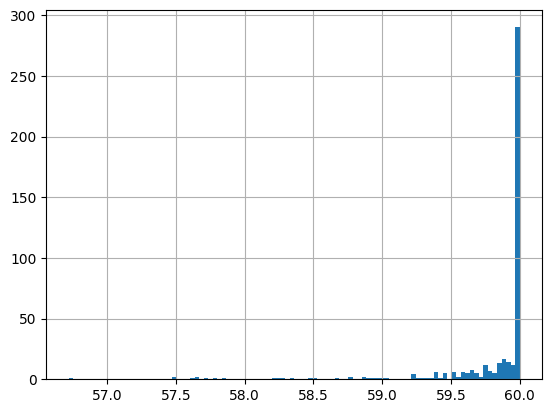

In [35]:
smpl_df['MQ'].hist(bins=100)

In [5]:
smpl_df.iloc[:20, :-2]

,CHROM,POS,REF,ALT,QUAL,DP,MQ,AN,CAR2463.GT,CAR2463.DP,CAR2463.AD,CAR2463.GQ,CAR2493_F.GT,CAR2493_F.DP,CAR2493_F.AD,CAR2493_F.GQ,CAR2494_M.GT,CAR2494_M.DP,CAR2494_M.AD,CAR2494_M.GQ
0,NC_056572.1,183383,C,G,14641.14,452,60.00,64,G|G,11.0,"0,11",33.0,C/C,12.0,"12,0",0.0,G|G,14.0,"0,14",42.0
6,NC_056572.1,258980,T,G,5076.92,442,59.90,64,G|G,16.0,"0,16",48.0,T/T,16.0,"16,0",0.0,G|G,12.0,"0,12",36.0
7,NC_056572.1,258981,G,C,5076.92,442,59.90,64,C|C,16.0,"0,16",48.0,G/G,16.0,"16,0",0.0,C|C,12.0,"0,12",36.0
9,NC_056572.1,259024,G,A,6464.00,547,60.00,64,A|A,16.0,"0,16",48.0,G/G,20.0,"20,0",0.0,A|A,17.0,"0,17",51.0
10,NC_056572.1,259030,A,T,7037.08,598,60.00,64,T|T,17.0,"0,17",51.0,A/A,25.0,"25,0",0.0,T|T,19.0,"0,19",57.0
11,NC_056572.1,275410,G,A,3061.50,609,59.78,64,A/A,11.0,"0,11",33.0,G/G,28.0,"28,0",75.0,G/A,22.0,"9,13",99.0
12,NC_056572.1,275464,C,T,1610.38,391,56.49,64,C/C,24.0,"24,0",0.0,T|T,11.0,"0,11",33.0,C/C,11.0,"11,0",33.0
13,NC_056572.1,275465,T,G,1610.43,388,56.49,64,T/T,24.0,"24,0",0.0,G|G,11.0,"0,11",33.0,T/T,11.0,"11,0",33.0
14,NC_056572.1,275469,G,A,1610.50,386,56.49,64,G/G,24.0,"24,0",0.0,A|A,11.0,"0,11",33.0,G/G,11.0,"11,0",33.0
16,NC_056572.1,292310,T,A,10698.90,431,60.00,64,T/T,11.0,"11,0",0.0,T|A,20.0,"7,13",99.0,A|A,15.0,"0,15",45.0


In [8]:
smpl_df[smpl_df['CAR2463.GQ'] > 60]

,CHROM,POS,REF,ALT,QUAL,DP,MQ,AN,CAR2463.GT,CAR2463.DP,...,CAR2493_F.GT,CAR2493_F.DP,CAR2493_F.AD,CAR2493_F.GQ,CAR2494_M.GT,CAR2494_M.DP,CAR2494_M.AD,CAR2494_M.GQ,PROBAND,INDEL
18,NC_056572.1,317230,G,A,16851.60,707,60.00,64,A/A,26.0,...,G/G,20.0,"19,1",45.0,A/A,15.0,"0,15",45.0,CAR2463,False
49,NC_056572.1,723246,G,"T,A",12280.95,485,59.54,64,G|T,16.0,...,G|T,16.0,"12,4,0",99.0,A|A,17.0,"0,0,15",57.0,CAR2463,False
51,NC_056572.1,730544,G,T,12414.79,710,59.94,64,G/G,26.0,...,G/T,25.0,"9,16",99.0,T/T,17.0,"2,15",2.0,CAR2463,False
133,NC_056572.1,1529401,A,T,5612.72,620,60.00,64,A/A,28.0,...,T/T,14.0,"1,13",4.0,A/A,14.0,"14,0",39.0,CAR2463,False
164,NC_056572.1,1828485,T,C,10824.79,390,59.93,64,C|C,21.0,...,T/T,11.0,"11,0",0.0,C|C,12.0,"0,12",36.0,CAR2463,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101497,NC_056615.1,8160451,A,T,10545.43,524,59.95,64,T|T,23.0,...,A/A,19.0,"19,0",0.0,A|T,18.0,"4,14",99.0,CAR2463,False
101548,NC_056615.1,8634913,C,T,13270.96,789,60.00,64,T|T,21.0,...,C/C,16.0,"16,0",48.0,C|T,19.0,"13,6",99.0,CAR2463,False
101551,NC_056615.1,8635067,G,A,11511.09,676,60.00,64,A|A,24.0,...,G/G,11.0,"11,0",0.0,G|A,25.0,"13,12",99.0,CAR2463,False
101552,NC_056615.1,8635068,A,T,11464.08,681,60.00,64,T|T,24.0,...,A/A,11.0,"11,0",0.0,A|T,25.0,"13,12",99.0,CAR2463,False


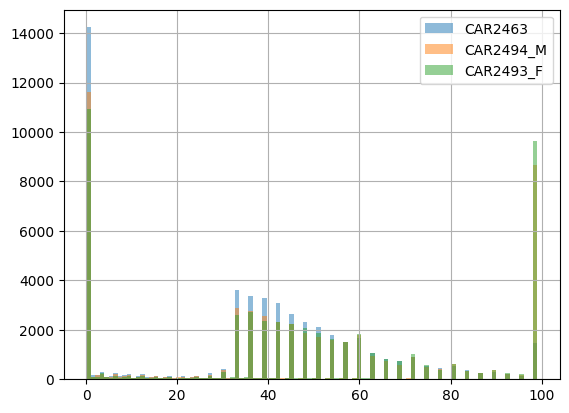

In [44]:
smpl_df['CAR2463.GQ'].hist(bins=100, alpha=0.5, label='CAR2463')
smpl_df['CAR2494_M.GQ'].hist(bins=100, alpha=0.5, label='CAR2494_M')
smpl_df['CAR2493_F.GQ'].hist(bins=100, alpha=0.5, label='CAR2493_F')
plt.legend()

<AxesSubplot:>

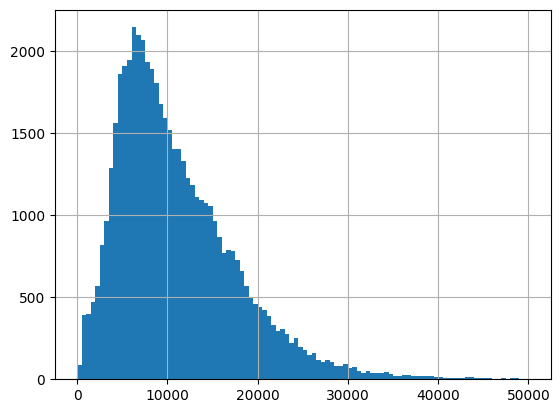

In [35]:
smpl_df['QUAL'][smpl_df['QUAL']<50000].hist(bins=100)

<AxesSubplot:xlabel='AC', ylabel='Density'>

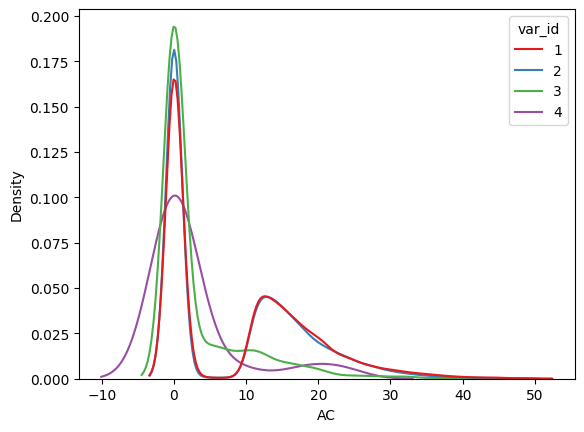

In [36]:
a = smpl_df['CAR2463.AD'].apply(lambda a: [int(x) for x in a.split(',')])\
    .explode().rename('AC')

a = pd.merge(a.reset_index(), a.index.value_counts().rename('nvar').reset_index(), on='index')
a = a.rename(columns={'index': 'snp_id'})

b = smpl_df['CAR2463.AD'].apply(lambda a: pd.Series({i: int(x) for i,x in enumerate(a.split(','), 1)}))
c = b.melt(var_name='var_id', value_name='AC')
sns.kdeplot(c[c.AC < 50], x='AC', hue='var_id', common_norm=False, palette='Set1')

<AxesSubplot:>

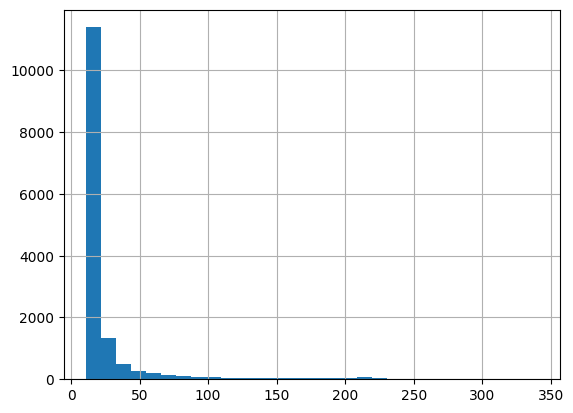

In [37]:
smpl_df['CAR2463.DP'].hist(bins=30)

In [3]:
# ['MT'] + 
chrom_order = [f'A{i}' for i in range(1, 26)] + [f'B{i}' for i in range(1, 26)]

In [ ]:
chrom_df = pd.read_csv('./data/interim/sequence_report.tsv', sep='\t')
chrom_acc2name = chrom_df.set_index('RefSeq seq accession')['Chromosome name'].to_dict()
chrom_name2size = chrom_df.set_index('Chromosome name')['Seq length'].to_dict()
chrom_df.head(2)

,Assembly Accession,Assembly-unit accession,Chromosome name,GC Count,GC Percent,GenBank seq accession,Molecule type,Ordering,RefSeq seq accession,Role,Seq length,UCSC style name,Unlocalized Count,Sequence name
0,GCF_018340385.1,Primary Assembly,A1,14461706.0,37.0,CM031245.1,Chromosome,NaN,NC_056572.1,assembled-molecule,39504823,NaN,NaN,A1
1,GCF_018340385.1,Primary Assembly,A2,10446150.0,37.0,CM031256.1,Chromosome,NaN,NC_056573.1,assembled-molecule,28433155,NaN,NaN,A2


## Analyse trio stats

In [4]:
labels = ['ctrl'] * 10 + ['nem-shok'] * 10 + ['nem'] * 10

In [5]:
# trio_stats = pd.read_csv('./data/interim/redo/trio.stats3.txt', 
trio_stats = pd.read_csv('./data/interim/cor/trio.stats.all.txt', 
                         comment='#', sep='\t', header=None)
trio_stats.columns += 1
trio_stats['group'] = len(trio_stats) // 30 * labels
trio_stats['dnm_mend_ratio'] = (trio_stats[7] - trio_stats[14]) / trio_stats[5]
trio_stats.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,group,dnm_mend_ratio
0,FLT0,CAR2463,CAR2494_M,CAR2493_F,19396121,16553385,469231,264311,5185643,4094882,6793033,6277962,1.08,203640,452046,ctrl,0.013693
1,FLT0,CAR2464,CAR2494_M,CAR2493_F,19706646,16819002,474469,280546,5139178,4301022,6880059,6379747,1.08,192457,455216,ctrl,0.014311


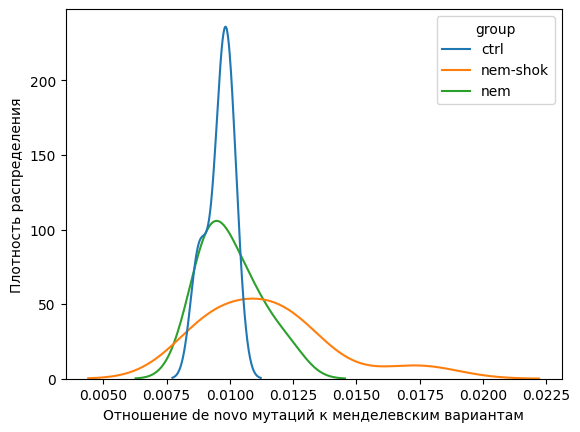

In [24]:
sns.kdeplot(trio_stats[(trio_stats[1] == 'FLT2') & (trio_stats.dnm_mend_ratio < 0.05)], 
              x='dnm_mend_ratio',  hue='group')
plt.ylabel('Плотность распределения');
plt.xlabel('Отношение de novo мутаций к менделевским вариантам');

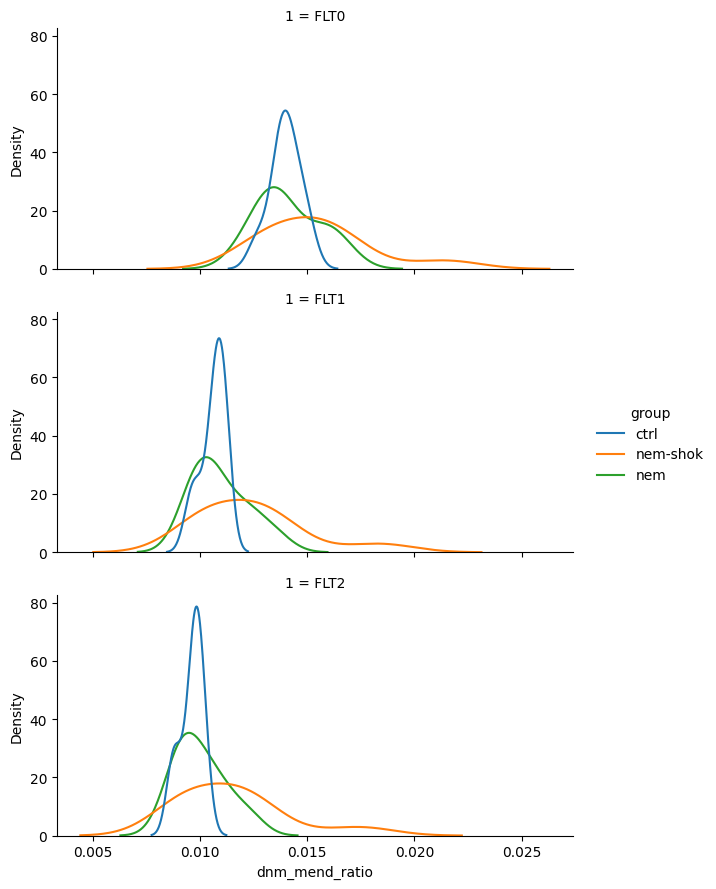

In [7]:
sns.displot(trio_stats[trio_stats.dnm_mend_ratio < 0.05], 
              x='dnm_mend_ratio', hue='group', row=1, 
              kind='kde', height=3, aspect=2,
)

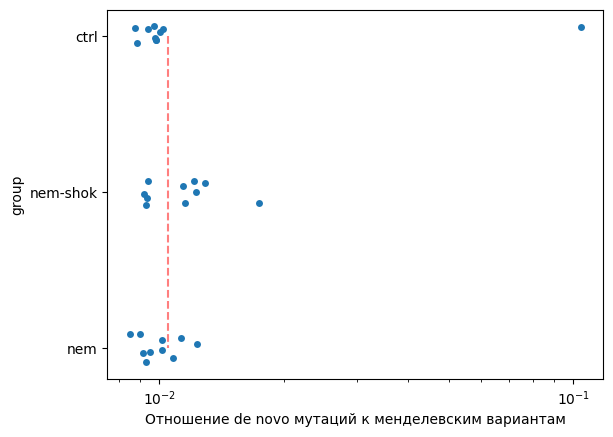

In [ ]:
sns.stripplot(trio_stats[(trio_stats.dnm_mend_ratio < 0.5) & (trio_stats[1] == 'FLT2')], 
              x='dnm_mend_ratio', y='group')

max_ctrl_val = trio_stats[(trio_stats[1] == 'FLT2') & \
                          (trio_stats['group'] == 'ctrl')]['dnm_mend_ratio']\
                                .sort_values().iloc[-2] + 3e-4

plt.vlines(max_ctrl_val, 0, 2, 'red', 'dashed', '0.02', alpha=0.5,)
plt.xlabel('Отношение de novo мутаций к менделевским вариантам')
plt.xscale('log')
plt.savefig('./figures/dnv_mend_ratio.pdf');

In [37]:
max_ctrl_val

0.010521100291506269

In [18]:
#wrong
wrong_trio_stats = pd.read_csv('./data/interim/redo/trio.stats.txt.wrong', 
                         comment='#', sep='\t', header=None)
wrong_trio_stats.columns += 1
# wrong_trio_stats['group'] = len(wrong_trio_stats) // 30 * labels
wrong_trio_stats['dnm_mend_ratio'] = wrong_trio_stats[7] / wrong_trio_stats[5]
wrong_trio_stats.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,dnm_mend_ratio
0,FLT0,CAR2463,CAR2473,CAR2475,17116581,13298996,1796804,1352283,2882519,2289074,7167584,6170581,1.16,444773,1792873,0.104974
1,FLT0,CAR2483,CAR2463,CAR2491,17403687,13729016,1827152,1419836,2926191,2579631,7397675,6373002,1.16,407108,1820947,0.104986


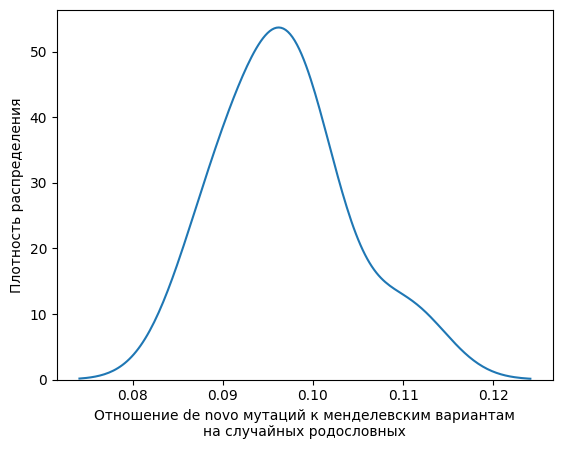

In [34]:
sns.kdeplot(wrong_trio_stats[(wrong_trio_stats[1] == 'FLT1') & (wrong_trio_stats.dnm_mend_ratio < 0.12)], 
              x='dnm_mend_ratio')
plt.xlabel('Отношение de novo мутаций к менделевским вариантам\nна случайных родословных');
plt.ylabel('Плотность распределения');

In [39]:
wrong_trio_stats[(wrong_trio_stats[1] == 'FLT1') & (wrong_trio_stats.dnm_mend_ratio < 0.12)].dnm_mend_ratio.describe()

count    8.000000
mean     0.096830
std      0.006942
min      0.087840
25%      0.092666
50%      0.096774
75%      0.099350
max      0.110371
Name: dnm_mend_ratio, dtype: float64

(0.01, 0.16)

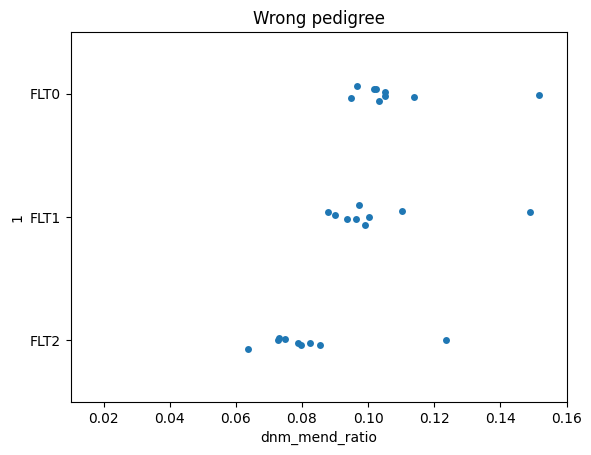

In [29]:
sns.stripplot(wrong_trio_stats, x='dnm_mend_ratio', y=1).set_title('Wrong pedigree');
plt.xlim(0.01, 0.16)

## Check quality on redo v2

In [17]:
df = pd.read_csv('./data/interim/redo/carps32.SNPs.v3.table', sep='\t')
df

,CHROM,POS,QUAL,DP,MQ,AC,AN,CAR2463.GT,CAR2463.DP,CAR2464.GT,...,CAR2490.GT,CAR2490.DP,CAR2491.GT,CAR2491.DP,CAR2492.GT,CAR2492.DP,CAR2493_F.GT,CAR2493_F.DP,CAR2494_?.GT,CAR2494_?.DP
0,NC_001606.1,141,8137.29,8863,37,64,64,T/T,189,T/T,...,T/T,188,T/T,240,T/T,170,T/T,187,T/T,191
1,NC_001606.1,169,7843.61,5853,36,62,64,G/G,134,G/G,...,G/G,139,G/G,99,G/G,138,G/G,131,A/A,146
2,NC_001606.1,192,7843.61,3438,30,62,64,T/T,68,T/T,...,T/T,82,T/T,82,T/T,95,T/T,79,C/C,54
3,NC_001606.1,401,47.56,4,30,"7,1",8,./.,0,./.,...,G/G,1,./.,0,./.,0,./.,0,./.,0
4,NC_001606.1,775,8140.28,7958,44,64,64,A/A,236,A/A,...,A/A,240,A/A,253,A/A,232,A/A,188,A/A,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21251938,NC_056621.1,24458053,2562.64,356,41,30,64,G/T,13,G/T,...,G/T,7,G/T,9,G/T,6,G/T,6,G/T,14
21251939,NC_056621.1,24463260,923.75,60,39,38,44,./.,0,./.,...,./.,0,./.,0,./.,0,A/A,3,A/A,1
21251940,NC_056621.1,24465661,1047.67,287,35,18,64,T/G,8,T/T,...,T/T,7,T/T,5,T/G,8,T/T,12,G/G,7
21251941,NC_056621.1,24465729,3209.37,383,37,36,64,T/A,6,T/A,...,T/A,10,T/T,6,A/A,9,T/A,12,T/A,11


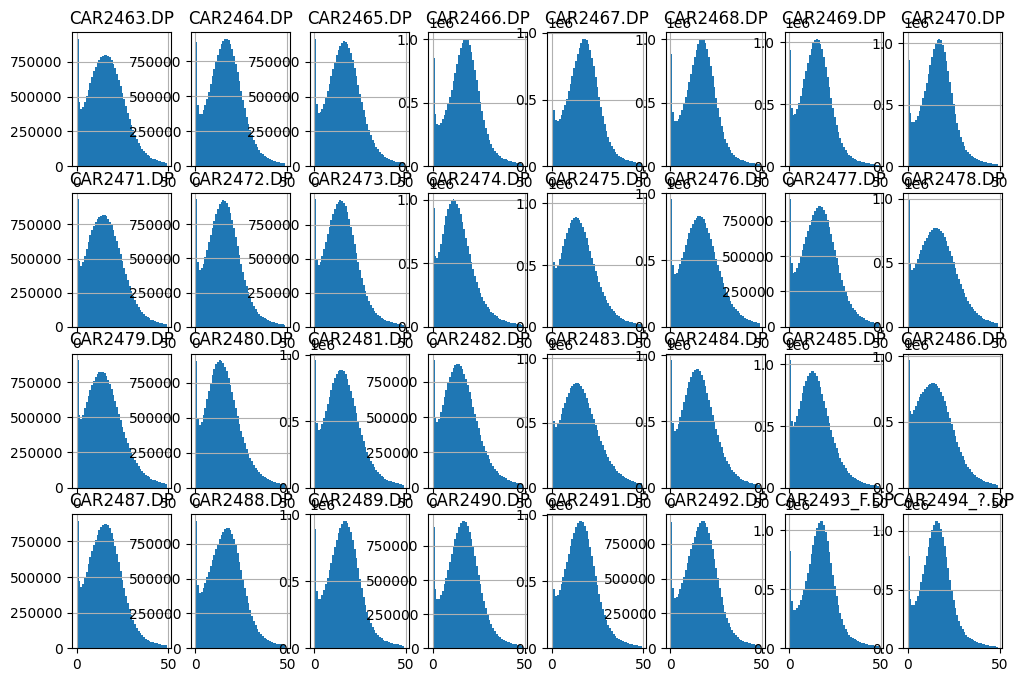

In [30]:
plt.figure(figsize=(12, 8))
for i,s in enumerate([x for x in df.columns if '.DP' in x], 1):
    plt.subplot(4, 8, i)
    df[s][df[s]<50].hist(bins=50)
    plt.title(s)

<AxesSubplot:>

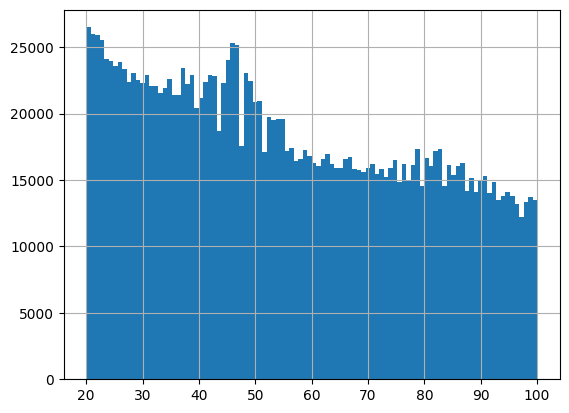

In [18]:
df.QUAL[df.QUAL < 100].hist(bins=100)

In [13]:
df[df.QUAL > 100].AN.value_counts()

64    17525464
62      647722
60      295724
58      197418
56      156560
54      132269
52      126453
50      109820
48       95533
46       86214
44       79164
42       72800
40       70489
38       65313
32       61997
36       57442
34       57158
30       56113
26       54215
28       52831
24       51147
12       47709
10       47218
22       46917
14       46006
16       45644
20       45589
18       45020
8        44550
6        13732
2        13453
4         2772
Name: AN, dtype: int64

## check quality of reads

In [2]:
##FORMAT=<ID=DP,Number=1,Type=Integer,Description="Number of high-quality bases">

qual = pd.read_csv('./data/interim/pos_qual_dp.txt', sep='\t', 
    header=None, names=['pos', 'qual', 'dp'])
qual

,pos,qual,dp
0,186,347.9240,18
1,264,742.6710,164
2,310,785.5400,235
3,410,1072.7600,258
4,419,1267.5300,245
...,...,...,...
28822041,24466013,29.4556,154
28822042,24466018,1710.7000,150
28822043,24466071,701.4380,129
28822044,24466075,700.1770,125


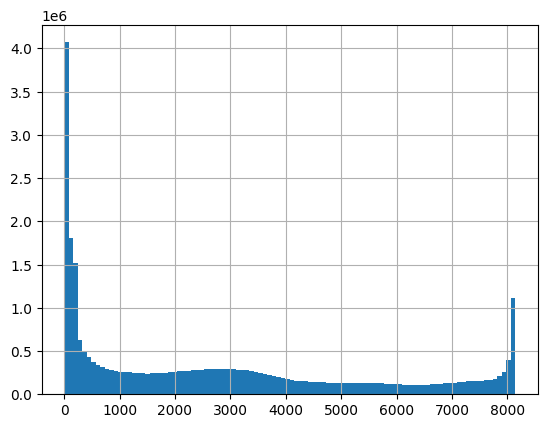

In [4]:
qual.qual.hist(bins=100);

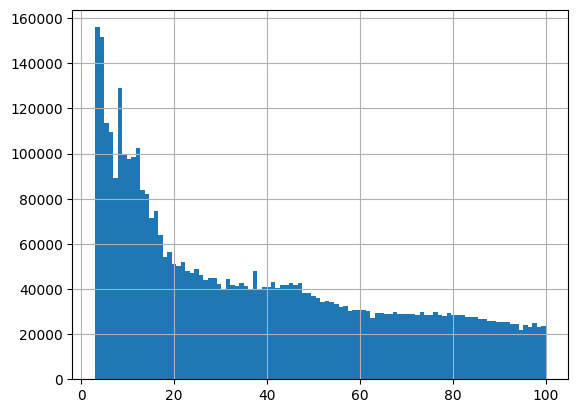

In [3]:
qual.qual[qual.qual < 100].hist(bins=100);

In [4]:
qual.qual[qual.qual < 30].shape

(2143177,)

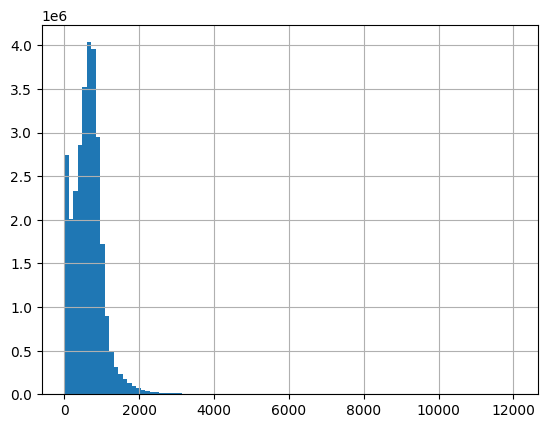

In [5]:
qual.dp.hist(bins=100);

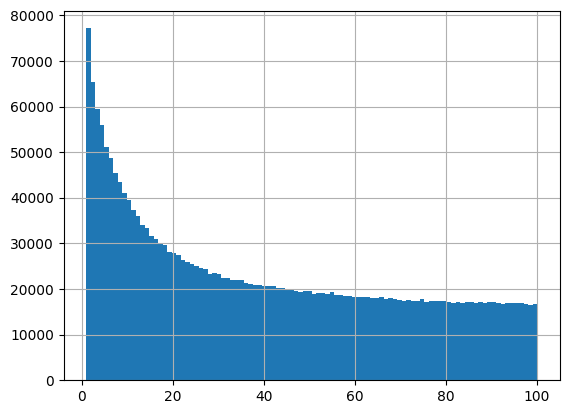

In [6]:
qual.dp[qual.dp.between(1, 100)].hist(bins=100);

## Drop useless columns

In [2]:
cols = 'CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	CAR2493_F	CAR2494_М	CAR2463	CAR2464	CAR2465	CAR2466	CAR2467	CAR2468	CAR2469	CAR2470	CAR2471	CAR2472	CAR2473	CAR2474	CAR2475	CAR2476	CAR2477	CAR2478	CAR2479	CAR2480	CAR2481	CAR2482	CAR2483	CAR2484	CAR2485	CAR2486	CAR2487	CAR2488	CAR2489	CAR2490	CAR2491	CAR2492'.split()
df = pd.read_csv('./data/interim/CARP_KANT.vcf', sep='\t', 
    comment='#', header=None, names=cols) # 8min
df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,CAR2493_F,...,CAR2483,CAR2484,CAR2485,CAR2486,CAR2487,CAR2488,CAR2489,CAR2490,CAR2491,CAR2492
0,NC_056572.1,186,.,C,T,347.924,.,DP=18;VDB=2.41924e-09;SGB=-1.31291;RPBZ=-0.848...,GT:PL:DP,"1/1:9,3,0:1",...,"./.:0,0,0:0","1/1:45,6,0:2","./.:0,0,0:0","./.:0,0,0:0","./.:0,0,0:0","./.:0,0,0:0","./.:0,0,0:0","./.:0,0,0:0","1/1:33,3,0:1","1/1:34,3,0:1"
1,NC_056572.1,264,.,atttttttt,attttttt,742.671,.,INDEL;IDV=12;IMF=1;DP=164;VDB=4.00419e-13;SGB=...,GT:PL:DP,"0/1:21,0,57:3",...,"1/1:55,6,0:2","0/1:24,0,27:2","0/1:24,0,30:2","0/0:0,6,66:2","1/1:47,6,0:2","0/1:30,3,0:1","0/1:21,0,57:3","0/1:56,0,104:7","0/0:0,12,108:4","0/0:0,21,146:7"
2,NC_056572.1,310,.,A,G,785.540,.,DP=235;VDB=0.108634;SGB=-1.65358;RPBZ=-0.77472...,GT:PL:DP,"0/1:52,0,111:5",...,"0/0:0,6,64:2","0/0:0,9,91:3","0/0:0,9,86:3","0/0:0,12,168:4","0/1:86,0,65:4","0/1:27,0,30:2","0/1:27,0,79:4","0/0:0,24,195:8","0/0:0,18,167:6","0/0:0,27,172:9"
3,NC_056572.1,410,.,G,C,1072.760,.,DP=258;VDB=0.440706;SGB=-13.0246;RPBZ=-0.60076...,GT:PL:DP,"0/0:0,18,144:6",...,"0/1:64,0,57:4","0/1:24,0,80:3","0/1:53,0,30:5","0/0:0,24,223:8","0/1:166,0,18:6","0/1:36,3,0:1","0/0:0,15,170:5","0/1:78,0,107:7","0/1:18,0,131:6","0/0:0,15,132:5"
4,NC_056572.1,419,.,C,T,1267.530,.,DP=245;VDB=0.134293;SGB=-9.73095;RPBZ=0.732702...,GT:PL:DP,"0/1:80,0,49:5",...,"0/0:0,9,118:3","0/1:80,0,28:3","0/1:31,0,17:4","0/1:112,0,118:9","0/0:0,15,192:5","0/0:0,6,64:2","0/0:0,15,169:5","0/1:99,0,77:7","0/1:129,0,20:6","0/1:52,0,76:6"


In [8]:
df['ID'].value_counts()

.    28822046
Name: ID, dtype: int64

In [9]:
df['FILTER'].value_counts()

.    28822046
Name: FILTER, dtype: int64

In [3]:
car_cols = [x for x in df.columns if 'CAR' in x]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28822046 entries, 0 to 28822045
Data columns (total 41 columns):
 #   Column     Dtype  
---  ------     -----  
 0   CHROM      object 
 1   POS        int64  
 2   ID         object 
 3   REF        object 
 4   ALT        object 
 5   QUAL       float64
 6   FILTER     object 
 7   INFO       object 
 8   FORMAT     object 
 9   CAR2493_F  object 
 10  CAR2494_М  object 
 11  CAR2463    object 
 12  CAR2464    object 
 13  CAR2465    object 
 14  CAR2466    object 
 15  CAR2467    object 
 16  CAR2468    object 
 17  CAR2469    object 
 18  CAR2470    object 
 19  CAR2471    object 
 20  CAR2472    object 
 21  CAR2473    object 
 22  CAR2474    object 
 23  CAR2475    object 
 24  CAR2476    object 
 25  CAR2477    object 
 26  CAR2478    object 
 27  CAR2479    object 
 28  CAR2480    object 
 29  CAR2481    object 
 30  CAR2482    object 
 31  CAR2483    object 
 32  CAR2484    object 
 33  CAR2485    object 
 34  CAR2486    objec

In [8]:
# test_df = pd.read_csv('./data/interim/header2.vcf', sep='\t', comment='#')

In [ ]:
df['is_indel'] = df['INFO'].str.contains('INDEL')

In [5]:
for c in car_cols:
    df[c+'_GT'] = df[c].str.slice(0, 3)

In [6]:
df['CAR2477_GT'].value_counts()

0/0    10296622
0/1     9582222
1/1     6039931
./.     2643140
1/2      171278
0/2       39824
1/3       22933
2/2       17800
2/3        7369
3/3         927
Name: CAR2477_GT, dtype: int64

In [7]:
df[df['CAR2477_GT'] == '1/2']

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,CAR2493_F,...,CAR2483_GT,CAR2484_GT,CAR2485_GT,CAR2486_GT,CAR2487_GT,CAR2488_GT,CAR2489_GT,CAR2490_GT,CAR2491_GT,CAR2492_GT
281,NC_056572.1,30401,.,caaaaa,"cAAaaaaa,cAAAaaaaa",7439.940,.,INDEL;IDV=36;IMF=0.9;DP=963;VDB=0.00572762;SGB...,GT:PL:DP,"1/1:218,21,0,218,21,218:7",...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/2,1/1
767,NC_056572.1,56024,.,taaaaaaaaaaaa,"tAaaaaaaaaaaaa,tAAaaaaaaaaaaaa",4544.460,.,INDEL;IDV=23;IMF=0.766667;DP=664;VDB=5.73186e-...,GT:PL:DP,"1/2:150,54,42,103,0,100:5",...,1/2,1/1,1/2,1/1,1/1,1/1,1/1,1/1,1/2,1/1
864,NC_056572.1,62405,.,cttttttttttttttttttttttt,"ctttttttttttttttt,cTTttttttttttttttttttttttt",3369.350,.,INDEL;IDV=25;IMF=0.833333;DP=747;VDB=1.07828e-...,GT:PL:DP,"1/1:255,27,0,255,27,255:9",...,1/1,./.,./.,1/2,1/1,1/1,1/2,1/2,./.,./.
1017,NC_056572.1,68820,.,aggtg,"ag,agtg",5498.470,.,INDEL;IDV=18;IMF=0.692308;DP=479;VDB=0.0011212...,GT:PL:DP,"1/2:135,68,69,66,0,67:7",...,1/2,1/2,1/2,1/2,1/1,1/2,1/2,2/2,1/2,1/2
1767,NC_056572.1,112164,.,tggggggggg,"tGGGGggggggggg,tGGGggggggggg,tGggggggggg",2076.390,.,INDEL;IDV=13;IMF=1;DP=233;VDB=3.10823e-30;SGB=...,GT:PL:DP,"./.:0,0,0,0,0,0,0,0,0,0:0",...,1/1,1/1,1/1,1/2,./.,1/3,./.,2/3,1/2,1/1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28821304,NC_056621.1,24389439,.,A,"C,T",4681.870,.,DP=1111;VDB=0.24544;SGB=-44.7611;RPBZ=-5.35576...,GT:PL:DP,"1/1:237,20,0,249,78,255:30",...,1/2,0/1,1/1,1/1,0/1,0/1,1/2,0/1,1/2,0/1
28821408,NC_056621.1,24397975,.,taaaaaaaaaaaaaaaaaa,"taaaaaaaaaaaaaaaa,taaaaaaaaaaaaaaa,taaaaaaaaaa...",7071.840,.,INDEL;IDV=33;IMF=0.825;DP=563;VDB=0.0850723;SG...,GT:PL:DP,"1/1:255,40,0,255,57,255,255,57,255,255:20",...,1/2,1/3,1/3,1/1,2/2,1/2,1/3,1/3,1/3,2/2
28821455,NC_056621.1,24405041,.,taaaaaaaaaaaaaaaaa,"tAAaaaaaaaaaaaaaaaaa,tAAAAaaaaaaaaaaaaaaaaa",5570.240,.,INDEL;IDV=26;IMF=0.787879;DP=646;VDB=0.0066792...,GT:PL:DP,"1/1:223,24,0,223,24,223:8",...,./.,1/1,./.,1/2,2/2,2/2,1/1,1/1,1/1,1/2
28821468,NC_056621.1,24408424,.,atttttttttttttttttttttt,"atttttttttttttttttttt,attttttttttttttttttt",3248.880,.,INDEL;IDV=22;IMF=0.758621;DP=490;VDB=0.0023395...,GT:PL:DP,"1/1:40,3,0,40,3,40:1",...,1/1,./.,./.,1/2,1/2,1/2,1/1,./.,1/1,1/2


In [11]:
cold_to_del = car_cols + ['FILTER', 'ID', 'INFO', 'FORMAT']
df_flt = df.drop(cold_to_del, axis=1)

In [15]:
df_flt.to_parquet('./data/interim/CARP_KANT.parquet')

## Main

In [8]:
# Calc the ident to parents
import numpy as np
import pandas as pd

d = pd.DataFrame({
    'mother': ['1/1', '0/1'],
    'father': ['0/1', '0/1'],
    'child': ['1/2', '0/2'],
})
d['mother'] = d['mother'].str.split('/').apply(set)
d['father'] = d['father'].str.split('/').apply(set)
d['child']  = d['child'].str.split('/').apply(set)
d
d.apply(lambda x: [len(x.child.intersection(x.mother)), 
                   len(x.child.intersection(x.father)),
                   len(x.child.difference(x.father.union(x.mother)))], axis=1)

0    [1, 1, 1]
1    [1, 1, 1]
dtype: object

In [2]:
df = pd.read_parquet('./data/interim/CARP_KANT.parquet')
df

,CHROM,POS,REF,ALT,QUAL,is_indel,CAR2493_F_GT,CAR2494_М_GT,CAR2463_GT,CAR2464_GT,...,CAR2483_GT,CAR2484_GT,CAR2485_GT,CAR2486_GT,CAR2487_GT,CAR2488_GT,CAR2489_GT,CAR2490_GT,CAR2491_GT,CAR2492_GT
0,NC_056572.1,186,C,T,347.9240,False,1/1,./.,./.,1/1,...,./.,1/1,./.,./.,./.,./.,./.,./.,1/1,1/1
1,NC_056572.1,264,atttttttt,attttttt,742.6710,True,0/1,0/1,1/1,0/1,...,1/1,0/1,0/1,0/0,1/1,0/1,0/1,0/1,0/0,0/0
2,NC_056572.1,310,A,G,785.5400,False,0/1,0/0,1/1,0/1,...,0/0,0/0,0/0,0/0,0/1,0/1,0/1,0/0,0/0,0/0
3,NC_056572.1,410,G,C,1072.7600,False,0/0,0/1,0/0,0/0,...,0/1,0/1,0/1,0/0,0/1,0/1,0/0,0/1,0/1,0/0
4,NC_056572.1,419,C,T,1267.5300,False,0/1,0/0,0/0,0/0,...,0/0,0/1,0/1,0/1,0/0,0/0,0/0,0/1,0/1,0/1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28822041,NC_056621.1,24466013,taaaa,tAaaaa,29.4556,True,0/0,./.,./.,./.,...,./.,./.,./.,./.,./.,./.,0/0,./.,./.,./.
28822042,NC_056621.1,24466018,C,A,1710.7000,False,1/1,1/1,1/1,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,0/1,1/1,1/1,./.
28822043,NC_056621.1,24466071,A,G,701.4380,False,0/0,0/1,0/0,1/1,...,0/0,0/1,0/1,0/0,0/0,0/0,0/1,1/1,0/1,0/0
28822044,NC_056621.1,24466075,C,T,700.1770,False,0/0,0/1,0/0,1/1,...,0/0,0/1,0/1,0/0,0/0,0/0,0/1,1/1,1/1,0/0


In [3]:
ident = pd.read_csv('./data/interim/ident.txt', sep='\t')
ident

,sample,mother,father,diff
0,CAR2464,1,-1,-1
1,CAR2465,1,-1,-1
2,CAR2466,1,-1,-1
3,CAR2467,1,-1,-1
4,CAR2470,1,-1,-1
...,...,...,...,...
782988390,CAR2484,1,1,1
782988391,CAR2487,1,1,0
782988392,CAR2488,1,1,0
782988393,CAR2489,1,1,1


In [10]:
ident_flt = ident[(ident == -1).sum(axis=1) == 0]
ident_flt['mother'] = ident_flt['mother'].astype(np.int8)
ident_flt['father'] = ident_flt['father'].astype(np.int8)
ident_flt['diff'] = ident_flt['diff'].astype(np.int8)
ident_flt.to_parquet('./data/interim/ident.parquet')
ident_flt.shape

/tmp/ipykernel_966630/1901051885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ident_flt['mother'] = ident_flt['mother'].astype(np.int8)
/tmp/ipykernel_966630/1901051885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ident_flt['father'] = ident_flt['father'].astype(np.int8)
/tmp/ipykernel_966630/1901051885.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

(740499391, 4)

In [2]:
ident_flt = pd.read_parquet('./data/interim/ident.parquet')
ident_flt

,sample,mother,father,diff
15,CAR2463,1,1,0
16,CAR2464,2,2,0
17,CAR2465,1,1,0
18,CAR2466,1,1,0
19,CAR2467,1,1,0
...,...,...,...,...
782988390,CAR2484,1,1,1
782988391,CAR2487,1,1,0
782988392,CAR2488,1,1,0
782988393,CAR2489,1,1,1


In [3]:
one = ident_flt[ident_flt['sample'] == 'CAR2463']
one

,sample,mother,father,diff
15,CAR2463,1,1,0
45,CAR2463,1,0,0
75,CAR2463,1,1,0
105,CAR2463,1,1,0
135,CAR2463,1,1,0
...,...,...,...,...
782988255,CAR2463,1,1,0
782988288,CAR2463,1,1,0
782988316,CAR2463,1,1,0
782988345,CAR2463,1,1,0


In [4]:
one['diff'].value_counts()

0    24063245
1      626704
2        1144
Name: diff, dtype: int64

In [20]:
one.apply(lambda x: (x.mother, x.father, x['diff']), axis=1).value_counts()

(1, 1, 0)       16099433
(1, 2, 0)        2691273
(2, 2, 0)        2615574
(2, 1, 0)        2235213
(1, 1, 1)         590356
(1, -1, -1)       541368
(-1, 1, -1)       514580
(-1, -1, -1)      293297
(1, 0, 0)         214795
(0, 1, 0)         202724
(-1, 2, -1)        35618
(2, -1, -1)        33460
(0, 0, 1)          25981
(0, -1, -1)        13178
(-1, 0, -1)        13061
(0, 1, 1)           5238
(1, 0, 1)           5129
(0, 2, 0)           2157
(2, 0, 0)           2076
(0, 0, 2)           1144
dtype: int64

In [ ]:
counts = ident_flt.value_counts()
counts.to_csv('./data/interim/indent_flt_counts.csv')
counts

sample   mother  father  diff
CAR2472  1       1       0       16433680
CAR2485  1       1       0       16350806
CAR2478  1       1       0       16317478
CAR2475  1       1       0       16224300
CAR2492  1       1       0       16196679
                                   ...   
CAR2483  0       0       2           1115
CAR2488  0       0       2           1091
CAR2489  0       0       2           1074
CAR2464  0       0       2           1065
CAR2478  0       0       2           1064
Length: 390, dtype: int64

In [17]:
counts.loc['CAR2492']

mother  father  diff
1       1       0       16196679
2       2       0        2643056
1       2       0        2617670
2       1       0        2290406
1       1       1         557650
        0       0         219830
0       1       0         180733
        0       1          25413
1       0       1           5503
0       1       1           5164
2       0       0           2319
0       2       0           2061
        0       2           1179
dtype: int64

In [42]:
df_counts = counts.rename('n').reset_index()
df_counts['gt'] = df_counts['mother'].astype(str) + df_counts['father'].astype(str) + df_counts['diff'].astype(str)
df_counts = df_counts.pivot('gt', 'sample', 'n')
df_count = df_counts / df_counts.sum()
df_count

sample,CAR2463,CAR2464,CAR2465,CAR2466,CAR2467,CAR2468,CAR2469,CAR2470,CAR2471,CAR2472,...,CAR2483,CAR2484,CAR2485,CAR2486,CAR2487,CAR2488,CAR2489,CAR2490,CAR2491,CAR2492
gt,,,,,,,,,,,,,,,,,,,,,
001,0.001052,0.000927,0.001118,0.001083,0.001054,0.001092,0.001042,0.001091,0.008785,0.000938,...,0.000938,0.001109,0.001044,0.001076,0.001054,0.001000,0.000948,0.000966,0.000958,0.001027
002,0.000046,0.000043,0.000051,0.000047,0.000047,0.000048,0.000054,0.000049,0.000133,0.000047,...,0.000045,0.000053,0.000053,0.000052,0.000053,0.000044,0.000043,0.000048,0.000046,0.000048
010,0.008210,0.007616,0.007923,0.007258,0.007245,0.008471,0.007669,0.008634,0.022936,0.007621,...,0.007781,0.008430,0.008369,0.008701,0.008634,0.008230,0.007005,0.007146,0.008198,0.007303
011,0.000212,0.000200,0.000220,0.000213,0.000214,0.000232,0.000215,0.000227,0.000273,0.000192,...,0.000192,0.000224,0.000208,0.000227,0.000242,0.000212,0.000198,0.000210,0.000218,0.000209
020,0.000087,0.000085,0.000085,0.000079,0.000079,0.000089,0.000085,0.000085,0.000085,0.000081,...,0.000083,0.000089,0.000087,0.000085,0.000093,0.000090,0.000081,0.000082,0.000093,0.000083
100,0.008699,0.008165,0.008806,0.008976,0.008512,0.009008,0.008636,0.008622,0.034783,0.008215,...,0.008855,0.009093,0.009068,0.009895,0.008703,0.008399,0.008983,0.008683,0.008336,0.008883
101,0.000208,0.000207,0.000225,0.000233,0.000225,0.000233,0.000223,0.000229,0.000430,0.000198,...,0.000206,0.000229,0.000208,0.000248,0.000240,0.000219,0.000217,0.000237,0.000223,0.000222
110,0.652034,0.645968,0.643495,0.628192,0.641372,0.635385,0.650848,0.634842,0.590638,0.665307,...,0.648115,0.638139,0.665736,0.619629,0.605078,0.648458,0.652165,0.644852,0.634242,0.654473
111,0.023910,0.024048,0.024533,0.025558,0.024698,0.024071,0.023378,0.025928,0.101229,0.024650,...,0.023619,0.023884,0.022476,0.028723,0.026909,0.023696,0.024593,0.023449,0.026653,0.022533


<AxesSubplot:xlabel='sample', ylabel='gt'>

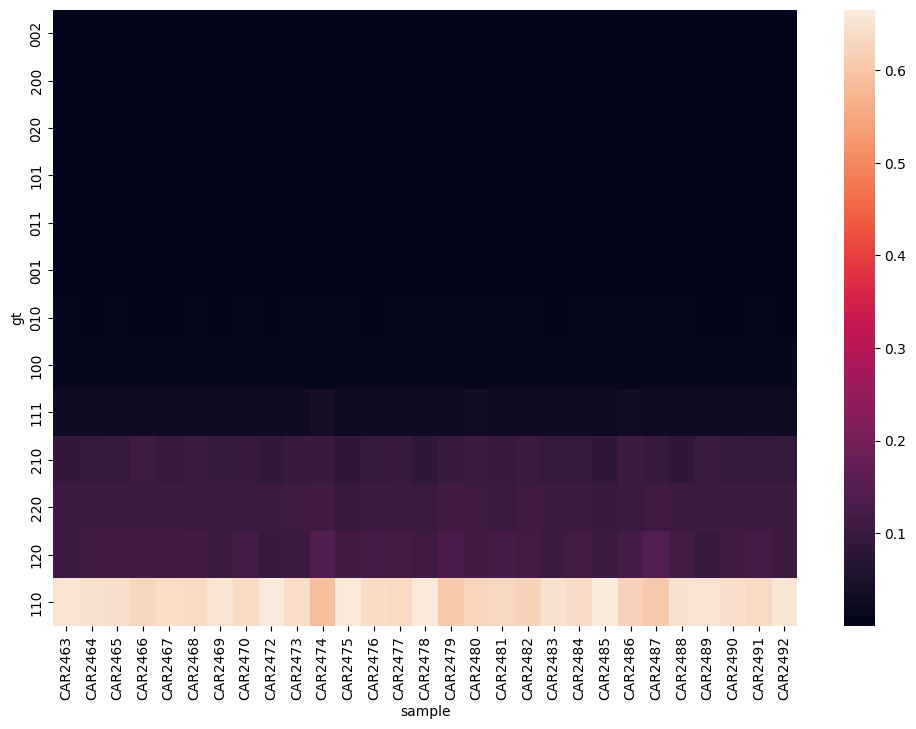

In [55]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_count.sort_values('CAR2463').drop('CAR2471', axis=1))

In [ ]:
two = ident_flt[ident_flt['sample'] == 'CAR2492']
two.apply(lambda x: (x.mother, x.father, x['diff']), axis=1).value_counts()

(1, 1, 0)       16196679
(2, 2, 0)        2643056
(1, 2, 0)        2617670
(2, 1, 0)        2290406
(1, 1, 1)         557650
(1, -1, -1)       557594
(-1, 1, -1)       502598
(-1, -1, -1)      306635
(1, 0, 0)         219830
(0, 1, 0)         180733
(2, -1, -1)        36357
(-1, 2, -1)        30360
(0, 0, 1)          25413
(-1, 0, -1)        14265
(0, -1, -1)        13653
(1, 0, 1)           5503
(0, 1, 1)           5164
(2, 0, 0)           2319
(0, 2, 0)           2061
(0, 0, 2)           1179
dtype: int64

In [ ]:
# df.head(10000).to_parquet('./data/interim/CARP_KANT.parquet.head')

In [8]:
car_cols = [x for x in df.columns if 'CAR' in x]
child_cols = car_cols[2:]
len(child_cols), child_cols

(30,
 ['CAR2463_GT',
  'CAR2464_GT',
  'CAR2465_GT',
  'CAR2466_GT',
  'CAR2467_GT',
  'CAR2468_GT',
  'CAR2469_GT',
  'CAR2470_GT',
  'CAR2471_GT',
  'CAR2472_GT',
  'CAR2473_GT',
  'CAR2474_GT',
  'CAR2475_GT',
  'CAR2476_GT',
  'CAR2477_GT',
  'CAR2478_GT',
  'CAR2479_GT',
  'CAR2480_GT',
  'CAR2481_GT',
  'CAR2482_GT',
  'CAR2483_GT',
  'CAR2484_GT',
  'CAR2485_GT',
  'CAR2486_GT',
  'CAR2487_GT',
  'CAR2488_GT',
  'CAR2489_GT',
  'CAR2490_GT',
  'CAR2491_GT',
  'CAR2492_GT'])

In [44]:
for c in tqdm.tqdm(car_cols):
    df[c] = df[c].replace('./.', '').str.split('/')\
        .apply(lambda x: {} if x[0] == '' else set(x))

  9%|▉         | 3/32 [05:39<54:44, 113.25s/it]


KeyboardInterrupt: 

In [6]:
df.head()

,CHROM,POS,REF,ALT,QUAL,CAR2493_F_GT,CAR2494_М_GT,CAR2463_GT,CAR2464_GT,CAR2465_GT,...,CAR2483_GT,CAR2484_GT,CAR2485_GT,CAR2486_GT,CAR2487_GT,CAR2488_GT,CAR2489_GT,CAR2490_GT,CAR2491_GT,CAR2492_GT
0,NC_056572.1,186,C,T,347.924,1/1,NaN,NaN,1/1,1/1,...,NaN,1/1,NaN,NaN,NaN,NaN,NaN,NaN,1/1,1/1
1,NC_056572.1,264,atttttttt,attttttt,742.671,0/1,0/1,1/1,0/1,0/0,...,1/1,0/1,0/1,0/0,1/1,0/1,0/1,0/1,0/0,0/0
2,NC_056572.1,310,A,G,785.540,0/1,0/0,1/1,0/1,0/0,...,0/0,0/0,0/0,0/0,0/1,0/1,0/1,0/0,0/0,0/0
3,NC_056572.1,410,G,C,1072.760,0/0,0/1,0/0,0/0,0/1,...,0/1,0/1,0/1,0/0,0/1,0/1,0/0,0/1,0/1,0/0
4,NC_056572.1,419,C,T,1267.530,0/1,0/0,0/0,0/0,0/1,...,0/0,0/1,0/1,0/1,0/0,0/0,0/0,0/1,0/1,0/1


In [7]:
df.columns

Index(['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'CAR2493_F_GT', 'CAR2494_М_GT',
       'CAR2463_GT', 'CAR2464_GT', 'CAR2465_GT', 'CAR2466_GT', 'CAR2467_GT',
       'CAR2468_GT', 'CAR2469_GT', 'CAR2470_GT', 'CAR2471_GT', 'CAR2472_GT',
       'CAR2473_GT', 'CAR2474_GT', 'CAR2475_GT', 'CAR2476_GT', 'CAR2477_GT',
       'CAR2478_GT', 'CAR2479_GT', 'CAR2480_GT', 'CAR2481_GT', 'CAR2482_GT',
       'CAR2483_GT', 'CAR2484_GT', 'CAR2485_GT', 'CAR2486_GT', 'CAR2487_GT',
       'CAR2488_GT', 'CAR2489_GT', 'CAR2490_GT', 'CAR2491_GT', 'CAR2492_GT'],
      dtype='object')

In [8]:
df.shape

(28822046, 37)

In [9]:
df['CAR2493_F_GT'].isna().sum()

2516576

In [10]:
nvar = len(df)
nvar_F = nvar - df['CAR2493_F_GT'].isna().sum()
nvar_M = nvar - df['CAR2494_М_GT'].isna().sum()
nvar, nvar_F, nvar_M

(28822046, 26305470, 26289881)

In [12]:
df

,CHROM,POS,REF,ALT,QUAL,CAR2493_F_GT,CAR2494_М_GT,CAR2463_GT,CAR2464_GT,CAR2465_GT,...,CAR2483_GT,CAR2484_GT,CAR2485_GT,CAR2486_GT,CAR2487_GT,CAR2488_GT,CAR2489_GT,CAR2490_GT,CAR2491_GT,CAR2492_GT
0,NC_056572.1,186,C,T,347.9240,1/1,NaN,NaN,1/1,1/1,...,NaN,1/1,NaN,NaN,NaN,NaN,NaN,NaN,1/1,1/1
1,NC_056572.1,264,atttttttt,attttttt,742.6710,0/1,0/1,1/1,0/1,0/0,...,1/1,0/1,0/1,0/0,1/1,0/1,0/1,0/1,0/0,0/0
2,NC_056572.1,310,A,G,785.5400,0/1,0/0,1/1,0/1,0/0,...,0/0,0/0,0/0,0/0,0/1,0/1,0/1,0/0,0/0,0/0
3,NC_056572.1,410,G,C,1072.7600,0/0,0/1,0/0,0/0,0/1,...,0/1,0/1,0/1,0/0,0/1,0/1,0/0,0/1,0/1,0/0
4,NC_056572.1,419,C,T,1267.5300,0/1,0/0,0/0,0/0,0/1,...,0/0,0/1,0/1,0/1,0/0,0/0,0/0,0/1,0/1,0/1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28822041,NC_056621.1,24466013,taaaa,tAaaaa,29.4556,0/0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0/0,NaN,NaN,NaN
28822042,NC_056621.1,24466018,C,A,1710.7000,1/1,1/1,1/1,1/1,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,0/1,1/1,1/1,NaN
28822043,NC_056621.1,24466071,A,G,701.4380,0/0,0/1,0/0,1/1,0/0,...,0/0,0/1,0/1,0/0,0/0,0/0,0/1,1/1,0/1,0/0
28822044,NC_056621.1,24466075,C,T,700.1770,0/0,0/1,0/0,1/1,0/0,...,0/0,0/1,0/1,0/0,0/0,0/0,0/1,1/1,1/1,0/0


In [11]:
(df['CAR2493_F_GT'] == df['CAR2494_М_GT']).sum()

12260455

In [13]:
(df['CAR2493_F_GT'] == df['CAR2464_GT']).sum()

16413790

In [14]:
(df['CAR2493_F_GT'] == df['CAR2483_GT']).sum()

16446845

In [15]:
data_isec = []
for ch in tqdm.tqdm(child_cols):
    ncommon_M = (df['CAR2494_М_GT'] == df[ch]).sum()
    ncommon_F = (df['CAR2493_F_GT'] == df[ch]).sum()
    private2M = nvar_M - ncommon_M
    private2F = nvar_F - ncommon_F
    
    nvar_ch = nvar - df[ch].isna().sum()

    private2chF = nvar_ch - ncommon_F
    private2chM = nvar_ch - ncommon_M

    data_isec.append((ch, ncommon_M, private2M, private2chM, ncommon_F, private2F, private2chF))
df_isec = pd.DataFrame(data_isec, columns=('ch', 'ncommon_M', 'private2M', 'private2chM', 'ncommon_F', 'private2F', 'private2chF'))

100%|██████████| 30/30 [01:52<00:00,  3.73s/it]


In [17]:
df_isec['iouM'] = df_isec['ncommon_M'] / (df_isec['ncommon_M'] + df_isec['private2M'] + df_isec['private2chM'])
df_isec['iouF'] = df_isec['ncommon_F'] / (df_isec['ncommon_F'] + df_isec['private2F'] + df_isec['private2chF'])


Groups:
- [63, 72] - control
- [73, 82] - NEM/SHOK
- [83, 92] - NEM

In [21]:
sample2gr = dict()
for i in range(63, 73):
    sample2gr[f'CAR24{i}_GT'] = 'Ctrl'
for i in range(73, 83):
    sample2gr[f'CAR24{i}_GT'] = 'NEM/SHOK'
for i in range(83, 93):
    sample2gr[f'CAR24{i}_GT'] = 'NEM'

In [23]:
df_isec['Group'] = df_isec['ch'].map(sample2gr)

In [24]:
df_isec

,ch,ncommon_M,private2M,private2chM,ncommon_F,private2F,private2chF,iouM,iouF,Group
0,CAR2463_GT,15861643,10428238,10274012,16279957,10025513,9855698,0.433806,0.450206,Ctrl
1,CAR2464_GT,16004171,10285710,10185242,16413790,9891680,9775623,0.438769,0.454914,Ctrl
2,CAR2465_GT,15878840,10411041,10269173,16174325,10131145,9973688,0.434334,0.445830,Ctrl
3,CAR2466_GT,15482932,10806949,10781137,16728693,9576777,9535376,0.417656,0.466749,Ctrl
4,CAR2467_GT,15762513,10527368,10450606,16470997,9834473,9742122,0.429023,0.456924,Ctrl
5,CAR2468_GT,15620105,10669776,10576420,16396207,9909263,9800318,0.423696,0.454116,Ctrl
6,CAR2469_GT,15638148,10651733,10457880,16403480,9901990,9692548,0.425554,0.455677,Ctrl
7,CAR2470_GT,15835269,10454612,10359242,16038315,10267155,10156196,0.432078,0.439868,Ctrl
8,CAR2471_GT,12657387,13632494,13420751,14502675,11802795,11575463,0.318741,0.382849,Ctrl
9,CAR2472_GT,15742553,10547328,10311003,16397320,9908150,9656236,0.430114,0.455966,Ctrl


<Axes: xlabel='Group', ylabel='private2chM'>

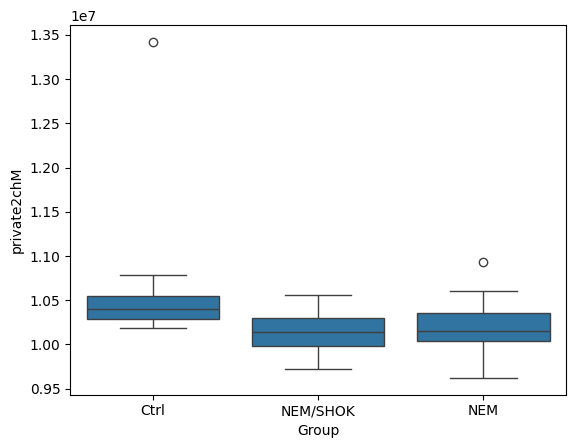

In [55]:
sns.boxplot(df_isec, y='private2chM', x='Group')

In [29]:
import pingouin as pg

pg.pairwise_tests(data=df_isec[df_isec.ch != 'CAR2471_GT'], 
                  dv='iouM', between='Group', parametric=False, padjust='bonf')

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges
0,Group,Ctrl,NEM,False,False,29.0,two-sided,0.205667,0.617002,bonf,-0.523503
1,Group,Ctrl,NEM/SHOK,False,False,24.0,two-sided,0.094166,0.282499,bonf,-0.829268
2,Group,NEM,NEM/SHOK,False,False,47.0,two-sided,0.850107,1.000000,bonf,-0.037968


In [46]:
pg.pairwise_tests(data=df_isec[df_isec.ch != 'CAR2471_GT'], 
                  dv='iouF', between='Group', parametric=False, padjust='bonf')

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges
0,Group,Ctrl,NEM,False,False,59.0,two-sided,0.270344,0.811032,bonf,0.446002
1,Group,Ctrl,NEM/SHOK,False,False,71.0,two-sided,0.037336,0.112009,bonf,0.857256
2,Group,NEM,NEM/SHOK,False,False,59.0,two-sided,0.520523,1.000000,bonf,0.307352


In [58]:
pg.kruskal(data=df_isec[df_isec.ch != 'CAR2471_GT'], dv='private2chM', between='Group')

,Source,ddof1,H,p-unc
Kruskal,Group,2,5.690728,0.058113


In [44]:
pg.kruskal(data=df_isec[df_isec.ch != 'CAR2471_GT'], dv='iouM', between='Group')

,Source,ddof1,H,p-unc
Kruskal,Group,2,3.12567,0.209541


In [25]:
df_isec.to_csv('./data/df_isec.tsv', sep='\t', index=False)

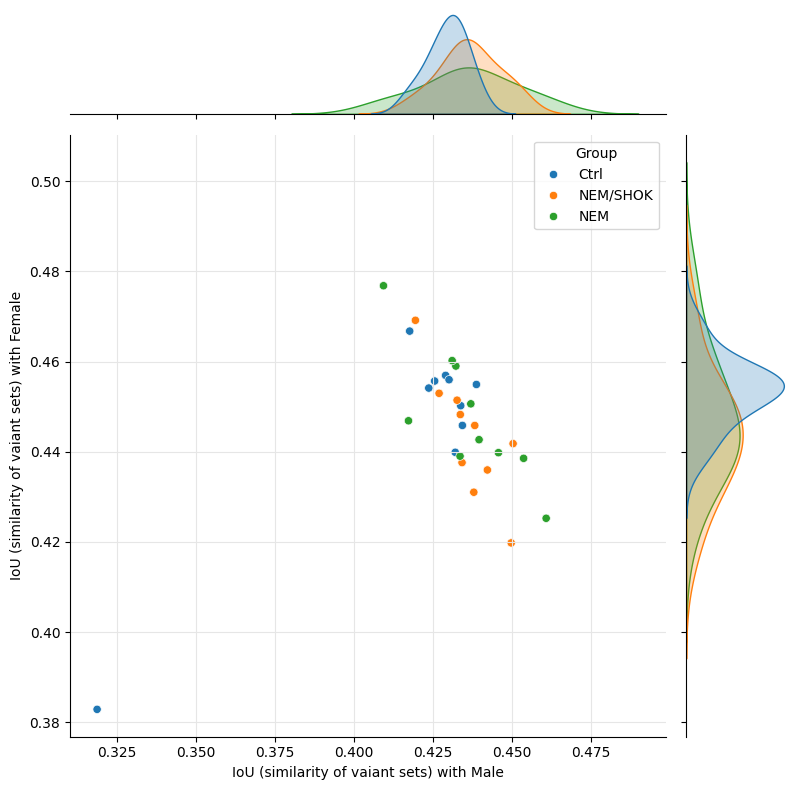

In [26]:
# plt.figure(figsize=(12, 8))
g = sns.jointplot(data=df_isec[df_isec.ch != 'CAR2471_GT'], x='iouM', y='iouF', hue='Group', kind="scatter", height=8, ratio=5)
sns.scatterplot(data=df_isec, x='iouM', y='iouF', hue='Group', legend=False)

plt.xlabel('IoU (similarity of vaiant sets) with Male')
plt.ylabel('IoU (similarity of vaiant sets) with Female')
plt.grid(color='0.9')
plt.savefig('./figures/IoU_children.pdf')
plt.show()